# Main

In [12]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin

def plotSimulationGraphs(data):
    plt.figure(1, (12, 10))
    plt.subplot(3, 3, 1)
    plt.plot(data["time"], data["altitude"])
    plt.title("Altitude")
    plt.subplot(3, 3, 2)
    plt.plot(data["time"], data["speed"])
    plt.title("Speed")
    plt.subplot(3, 3, 3)
    plt.plot(data["time"], data["angle"])
    plt.title("Angle")
    plt.subplot(3, 3, 4)
    plt.plot(data["time"], data["thrust"])
    plt.title("Thrust")
    plt.subplot(3, 3, 5)
    plt.plot(data["time"], data["mass"])
    plt.title("Mass")
    plt.show()

def main(deltaTime = .1, simulationTime = 2e4, dataCollectionInterval = 10, showScene: bool = False, showGraphs: bool = False, printOutput: bool = False, collectData = False, maxDataTime: float = 1e10, angles = [0, 10, 25, 45, 70, 85, 90, 100], time_angle_pairs = []):
    if time_angle_pairs == []: result = subprocess.run(["./program.exe"], input=f'{deltaTime} {simulationTime} {dataCollectionInterval} 0\n0', capture_output=True, text=True)
    else: result = subprocess.run(["./program.exe"], input=f'{deltaTime} {simulationTime} {dataCollectionInterval} {len(time_angle_pairs)//2}\n{'\n'.join([f'{time_angle_pairs[2*i]} {time_angle_pairs[2*i+1]}' for i in range(len(time_angle_pairs)//2)])} \n0', capture_output=True, text=True)

    sts = result.stdout

    h = sts.split("\n")[1:]

    minMaxAltitude = [10e10, 0]

    if printOutput:
        print(*h[:min(len(h), int(maxDataTime / dataCollectionInterval))], sep="\n")

    sts = sts.replace("\n", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ")

    tt = sts.split(" ")

    g = " ".join(h[min(len(h)-1, int(1_000 / dataCollectionInterval)):]).replace("\n", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split(" ")

    for i, el in enumerate(g):
        if el == "Altitude:":
            altitude = float(g[i + 1])
            minMaxAltitude[0] = min(minMaxAltitude[0], altitude)
            minMaxAltitude[1] = max(minMaxAltitude[1], altitude)
    
    data = {"time": [], "drag": [], "altitude": [], "speed": [], "thrust": [], "mass": [], "angle": []}

    if showGraphs or showScene or collectData:
        xs = []
        ys = []
        times = []

        for i, el in enumerate(tt):
            if el == "Time:":
                if float(tt[i + 1]) > maxDataTime:
                    break
                times.append(float(tt[i + 1]))
            if el == "Speed:":
                speedx = float(tt[i + 2][:-1] if tt[i + 2][-1] == ',' else tt[i + 2])
                speedy = float(tt[i + 3][:-1] if tt[i + 3][-1] == ')' else tt[i + 3])
                data["speed"].append(((speedx - 407.5)**2 + speedy**2)**.5)
            if el == "Position:":
                xs.append(float(tt[i + 2][:-1] if tt[i + 2][-1] == ',' else tt[i + 2]))
                ys.append(float(tt[i + 3][:-1] if tt[i + 3][-1] == ')' else tt[i + 3]))
            if el == "Altitude:":
                data["altitude"].append(float(tt[i + 1]))
            if el == "Drag:":
                data["drag"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Thrust:":
                data["thrust"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Mass:":
                data["mass"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Angle:":
                data["angle"].append(90 - float(tt[i + 1]))

        data["time"] = times.copy()
    
    if showScene:
        for i in range(1000):
            pos = [cos(i / 500 * pi) * 6_378_000, sin(i / 500 * pi) * 6_378_000 - 6_378_000]
            xs.append(float(pos[0]))
            ys.append(float(pos[1]))
            times.append(-simulationTime/2)

        plt.figure(2, (10, 8))
        plt.scatter(np.array(xs), np.array(ys), c=np.array(times), cmap='viridis')
        plt.colorbar()
        plt.title("Scene")
        plt.show()

    if showGraphs:
        plotSimulationGraphs(data)

    if printOutput:
        print(f'Min altitude: {minMaxAltitude[0]}')
        print(f'Max altitude: {minMaxAltitude[1]}')
    
    success = h[-2] != "System has been stopped with message: \"Rocket has been crushed\"" if len(h) > 1 else "\"Rocket has been crushed\""

    return {"output": sts, "minMaxAltitude": minMaxAltitude, "success": success, "data": data}


### Visualization

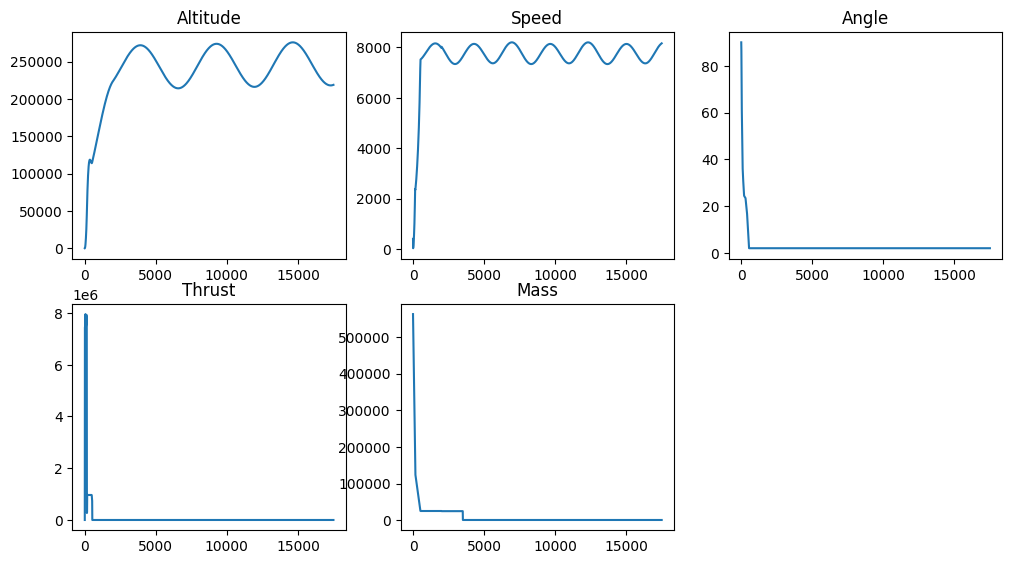

In [18]:
angles = [5.55, 22.49, 33.67, 48.08, 53.98, 57.82, 60.23, 65.56, 66.65, 72.3, 88]
time_angle_pairs = [0, 0, 15, (angles[0] if len(angles) > 0 else 0), 25, (angles[1] if len(angles) > 1 else 0), 50, (angles[2] if len(angles) > 2 else 0), 75, (angles[3] if len(angles) > 3 else 0), 100, (angles[4] if len(angles) > 4 else 0), 125, (angles[5] if len(angles) > 5 else 0), 150, (angles[6] if len(angles) > 6 else 0), 200, (angles[7] if len(angles) > 7 else 0), 300, (angles[8] if len(angles) > 8 else 0), 400, (angles[9] if len(angles) > 9 else 0), 550, (angles[10] if len(angles) > 10 else 0), 1e6, 90]

out = main(deltaTime=.1, simulationTime=17500, dataCollectionInterval=10, showGraphs=True, time_angle_pairs=time_angle_pairs)

In [1]:
alt = [(0.8098730468748698, 85.87995870911982), (1.045593261718622, 86.86280594056007), (1.1368969726561318, 87.29809807578567), (1.236684570312363, 87.80899676622357), (1.3296948242186204, 88.31845513544977), (1.4043749999998738, 88.75086273532361), (1.4859936523436232, 89.24736261938233), (1.5620654296873653, 89.73269897513092), (1.623217773437375, 90.1399227877846), (1.6932177734374108, 90.6272224506829), (1.7632177734374466, 91.13368019205518), (1.8232177734374773, 91.58309255167842), (1.893217773437513, 92.12532813707367), (1.9532177734375438, 92.60551572917029), (2.0332177734375847, 93.26798425347079), (2.0932177734376154, 93.78155942016747), (2.153217773437646, 94.30952146020718), (2.223217773437682, 94.94372236798517), (2.2832177734377126, 95.50301668955944), (2.3532177734377484, 96.17390660603996), (2.413217773437779, 96.76476727251429), (2.4632177734378047, 97.26833925337996), (2.5532177734378507, 98.20049680839293), (2.6232177734378865, 98.94847165432293), (2.6832177734379172, 99.60565432161093), (2.753217773437953, 100.3911791065475), (2.8132177734379837, 101.08067490905523), (2.8632177734380093, 101.66671353182755), (2.933217773438045, 102.50473990326282), (2.993217773438076, 103.2394298891304), (3.0632177734381116, 104.11576650862116), (3.113217773438137, 104.75442861823831), (3.183217773438173, 105.66641896823421), (3.2432177734382037, 106.46477375330869), (3.3232177734382446, 107.55325946339872), (3.3732177734382702, 108.24755097192246), (3.443217773438306, 109.2377073202515), (3.5032177734383367, 110.103322521667), (3.5732177734383725, 111.13300625630654), (3.6432177734384084, 112.18409039406106), (3.713217773438444, 113.25665166799445), (3.78321777343848, 114.35076496761758), (3.853217773438516, 115.46651080658194), (3.9232177734385516, 116.60396103549283), (3.9932177734385874, 117.7631858382374), (4.053217773438618, 118.774198344443), (4.133217773438659, 120.14726475870702), (4.203217773438695, 121.37226713984273), (4.273217773438731, 122.6193447848782), (4.353217773438772, 124.07170965243131), (4.403217773438797, 124.99418464733753), (4.473217773438833, 126.30477894260548), (4.533217773438864, 127.4459755445132), (4.6032177734388995, 128.79825308232103), (4.68321777343894, 130.37137833342422), (4.753217773438976, 131.7721960413037), (4.813217773439007, 132.9910685805371), (4.873217773439038, 134.22677940723952), (4.933217773439068, 135.47940401430242), (4.993217773439099, 136.74899914010894), (5.07321777343914, 138.468298710417), (5.133217773439171, 139.77772474091034), (5.203217773439206, 141.32707940391265), (5.263217773439237, 142.67375099286437), (5.323217773439268, 144.0376869913889), (5.3832177734392985, 145.4189278181875), (5.443217773439329, 146.81752158375457), (5.513217773439365, 148.47118658188265), (5.573217773439396, 149.90749601693824), (5.633217773439426, 151.3612661487423), (5.703217773439462, 153.07945349323563), (5.763217773439493, 154.57117902906612), (5.823217773439524, 156.08046632725745), (5.883217773439554, 157.60734734893776), (5.95321777343959, 159.41098565491848), (6.003217773439616, 160.7140081009129), (6.0732177734396515, 162.55887471244205), (6.1532177734396925, 164.69682656915393), (6.233217773439733, 166.86634580069222), (6.293217773439764, 168.51423588756006), (6.3632177734398, 170.45930119953118), (6.443217773439841, 172.7120041118469), (6.5032177734398715, 174.42240233148914), (6.563217773439902, 176.15071558381896), (6.613217773439928, 177.60468626883812), (6.683217773439964, 179.661224923213), (6.733217773439989, 181.14517807017546), (6.783217773440015, 182.6416532533476), (6.853217773440051, 184.75776482664514), (6.913217773440081, 186.59114664327353), (6.963217773440107, 188.13278936431743), (7.043217773440148, 190.62556791235693), (7.123217773440189, 193.15057098388206), (7.20321777344023, 195.7078284501331), (7.273217773440265, 197.97190444578882), (7.333217773440296, 199.932222958887), (7.413217773440337, 202.57426637597382), (7.483217773440373, 204.91264048952144), (7.5332177734403984, 206.59834503533784), (7.613217773440439, 209.32317587686703), (7.67321777344047, 211.38958262105007), (7.753217773440511, 214.17525782552548), (7.813217773440542, 216.28735283762217), (7.873217773440572, 218.4190097405808), (7.933217773440603, 220.5702169610886), (8.003217773440639, 223.10465373820625), (8.08321777344068, 226.03368864103686), (8.133217773440705, 227.88194679049775), (8.213217773440746, 230.86732034641318), (8.283217773440782, 233.50793782062829), (8.363217773440823, 236.5582525242353), (8.443217773440864, 239.64318745722994), (8.523217773440905, 242.7627384676598), (8.57321777344093, 244.7300371787278), (8.633217773440961, 247.10864887421485), (8.713217773441002, 250.3104416814167), (8.773217773441033, 252.7345294477418), (8.843217773441069, 255.5872817542404), (8.913217773441104, 258.46659408847336), (8.973217773441135, 260.9557285803603), (9.033217773441166, 263.4643981641857), (9.103217773441202, 266.41588816512376), (9.163217773441232, 268.96692943864036), (9.243217773441273, 272.3987684608437), (9.313217773441309, 275.4301900831051), (9.383217773441345, 278.488285024534), (9.463217773441386, 282.01593375124503), (9.523217773441417, 284.68455598317087), (9.593217773441452, 287.8227545522386), (9.653217773441483, 290.53391113714315), (9.723217773441519, 293.7217591367662), (9.78321777344155, 296.4754951695213), (9.84321777344158, 299.2488954004366), (9.913217773441616, 302.5093916391488), (9.973217773441647, 305.32542366802227), (10.043217773441683, 308.6356823233655), (10.093217773441708, 311.0165699872887), (10.173217773441749, 314.8544633425772), (10.243217773441785, 318.2413780806819), (10.31321777344182, 321.65514952212106), (10.383217773441856, 325.0957999420352), (10.443217773441887, 328.06633977999445), (10.503217773441918, 331.0566566355992), (10.573217773441954, 334.5703715264099), (10.633217773441984, 337.60358326276764), (10.70321777344202, 341.1673873803811), (10.753217773442046, 343.72949455934577), (10.833217773442087, 347.8575479614083), (10.883217773442112, 350.45552032382693), (10.953217773442148, 354.11588293581735), (11.003217773442174, 356.74701368331444), (11.07321777344221, 360.4538401487516), (11.15321777344225, 364.72345438296907), (11.203217773442276, 367.40998824022245), (11.273217773442312, 371.19445409055334), (11.353217773442353, 375.5528992175823), (11.403217773442378, 378.29500813107006), (11.473217773442414, 382.15735592797864), (11.533217773442445, 385.48968941613566), (11.58321777344247, 388.28198659501504), (11.653217773442506, 392.2146677033743), (11.723217773442542, 396.17475590808317), (11.783217773442573, 399.59095799166244), (11.843217773442603, 403.0273454047274), (11.903217773442634, 406.4839415262686), (11.97321777344267, 410.54221463017166), (12.023217773442695, 413.4578645970905), (12.083217773442726, 416.97523129556794), (12.153217773442762, 421.1044828920858), (12.213217773442793, 424.6658612000756), (12.283217773442829, 428.84652950207237), (12.34321777344286, 432.4520442284411), (12.40321777344289, 436.0779780728044), (12.46321777344292, 439.72435751510784), (12.543217773442962, 444.6180411441019), (12.593217773442987, 447.6950995679945), (12.663217773443023, 452.02693925600033), (12.733217773443059, 456.3867884245701), (12.79321777344309, 460.14613478805404), (12.863217773443125, 464.55812281754334), (12.923217773443156, 468.36222638376057), (12.993217773443192, 472.8265401311219), (13.043217773443217, 476.03264609049074), (13.113217773443253, 480.5454866193468), (13.173217773443284, 484.43624906393234), (13.24321777344332, 489.00190591218416), (13.30321777344335, 492.93801488669124), (13.373217773443386, 497.55666232213844), (13.443217773443422, 502.2039280445315), (13.503217773443453, 506.2101297947811), (13.563217773443483, 510.23744301171973), (13.623217773443514, 514.2858917696867), (13.683217773443545, 518.3555107302964), (13.743217773443575, 522.4463401172543), (13.803217773443606, 526.5584183408646), (13.863217773443637, 530.6917875231011), (13.943217773443678, 536.2361298697069), (13.993217773443703, 539.7206430409569), (14.06321777344374, 544.6239539334783), (14.12321777344377, 548.8500284202164), (14.193217773443806, 553.8075923384167), (14.253217773443836, 558.0802305912366), (14.313217773443867, 562.3744065755745), (14.373217773443898, 566.6901575902011), (14.433217773443928, 571.0275198386516), (14.503217773443964, 576.1151386223501), (14.563217773443995, 580.499432526296), (14.623217773444026, 584.9054136197083), (14.683217773444056, 589.3331087785773), (14.763217773444097, 595.2705387240276), (14.833217773444133, 600.4975745459087), (14.893217773444164, 605.0015369815519), (14.953217773444194, 609.5273478720337), (15.02321777344423, 614.8351458440302), (15.083217773444261, 619.4084918464068), (15.143217773444292, 624.0038893051678), (15.213217773444327, 629.3931470556417), (15.283217773444363, 634.8126238594996), (15.353217773444399, 640.2623944998486), (15.443217773444445, 647.3138481579954), (15.503217773444476, 652.0427513909526), (15.563217773444507, 656.7940222031903), (15.633217773444542, 662.3654571621446), (15.703217773444578, 667.9673801456811), (15.783217773444619, 674.4046390885487), (15.833217773444645, 678.4393762191758), (15.913217773444686, 684.9106538380729), (15.983217773444721, 690.5888123927871), (16.073217773444767, 697.9109000356402), (16.143217773444803, 703.6226210771129), (16.203217773444834, 708.5300514061237), (16.263217773444865, 713.4482717253268), (16.3332177734449, 719.1998476508306), (16.403217773444936, 724.9661401584744), (16.463217773444967, 729.9204123975942), (16.523217773444998, 734.8855422012275), (16.58321777344503, 739.8615610955749), (16.653217773445064, 745.6807140896562), (16.733217773445105, 752.3494130264735), (16.78321777344513, 756.5272381565301), (16.853217773445166, 762.3889834519941), (16.923217773445202, 768.2656705575064), (16.993217773445238, 774.157303755288), (17.05321777344527, 779.2191591449082), (17.1132177734453, 784.2919870852493), (17.183217773445335, 790.2241585626034), (17.25321777344537, 796.1712746410631), (17.303217773445397, 800.428358081961), (17.373217773445432, 806.4010615901789), (17.433217773445463, 811.5323876319453), (17.513217773445504, 818.39119291713), (17.573217773445535, 823.5480696557788), (17.64321777344557, 829.5782605347922), (17.72321777344561, 836.4881471096305), (17.783217773445642, 841.6839231105987), (17.863217773445683, 848.6366114304401), (17.923217773445714, 853.8705818869639), (18.01321777344576, 861.752788866288), (18.0932177734458, 868.7906495465431), (18.17321777344584, 875.8580870205769), (18.243217773445878, 882.0663183467695), (18.293217773445903, 886.5145855267765), (18.38321777344595, 894.550419191015), (18.433217773445975, 899.0308385540266), (18.493217773446005, 904.4224799111253), (18.58321777344605, 912.5408872831613), (18.643217773446082, 917.9737626082497), (18.703217773446113, 923.4230886156438), (18.79321777344616, 931.62790823658), (18.843217773446185, 936.202110409853), (18.923217773446225, 943.5445145209087), (19.003217773446266, 950.9160566224018), (19.053217773446292, 955.5380693210755), (19.123217773446328, 962.0280202388531), (19.18321777344636, 967.6085949819535), (19.2632177734464, 975.074847972719), (19.313217773446425, 979.7560428123688), (19.393217773446466, 987.2696106061339), (19.453217773446497, 992.9238939858042), (19.523217773446532, 999.5412363125943), (19.59321777344657, 1006.180813952582), (19.6532177734466, 1011.8895660655107), (19.73321777344664, 1019.5266221207567), (19.803217773446676, 1026.232839698554), (19.863217773446706, 1031.9986754702404), (19.953217773446752, 1040.6779329264536), (20.023217773446788, 1047.4537548698718), (20.073217773446814, 1052.3071517132921), (20.14321777344685, 1059.120802415884), (20.193217773446875, 1064.0011895281496), (20.26321777344691, 1070.8526148417732), (20.32321777344694, 1076.7427905796794), (20.393217773446978, 1083.6350716374582), (20.463217773447013, 1090.5492772858124), (20.523217773447044, 1096.4931602807483), (20.603217773447085, 1104.4433252692688), (20.663217773447116, 1110.4246756923385), (20.73321777344715, 1117.423169649206), (20.793217773447182, 1123.4392033988843), (20.863217773447218, 1130.4781001686351), (20.92321777344725, 1136.5287361482624), (20.993217773447284, 1143.607978719403), (21.073217773447325, 1151.7250907937996), (21.12321777344735, 1156.8126392096747), (21.193217773447387, 1163.9537325481651), (21.253217773447417, 1170.0918556181714), (21.313217773447448, 1176.2458277967526), (21.39321777344749, 1184.4757342748344), (21.45321777344752, 1190.6665759871248), (21.523217773447556, 1197.9091302963207), (21.59321777344759, 1205.173087083036), (21.663217773447627, 1212.45842105872), (21.713217773447653, 1217.6752927070484), (21.793217773447694, 1226.0448692659847), (21.853217773447724, 1232.3402645853348), (21.90321777344775, 1237.5983367474983), (21.973217773447786, 1244.9778081725817), (22.033217773447817, 1251.3199171953602), (22.103217773447852, 1258.7386616307776), (22.163217773447883, 1265.1143511446426), (22.23321777344792, 1272.5721471155994), (22.303217773447955, 1280.0508768666768), (22.37321777344799, 1287.5504543667194), (22.443217773448026, 1295.0707513588713), (22.503217773448057, 1301.5331068505766), (22.553217773448083, 1306.9298907539342), (22.633217773448123, 1315.586328371428), (22.693217773448154, 1322.0959860916482), (22.76321777344819, 1329.7092494313838), (22.82321777344822, 1336.250837944448), (22.88321777344825, 1342.8071075498592), (22.953217773448245, 1350.4746797470143), (23.01321777344819, 1357.0628954626154), (23.063217773448144, 1362.5644495148445), (23.13321777344808, 1370.284158636001), (23.193217773448026, 1376.917525358731), (23.273217773447954, 1385.7859923409997), (23.3332177734479, 1392.4555677347817), (23.413217773447826, 1401.3730417562183), (23.483217773447763, 1409.1993418305647), (23.5532177734477, 1417.0478989848634), (23.643217773447617, 1427.172067763866), (23.713217773447553, 1435.0724831527332), (23.7732177734475, 1441.8625385650666), (23.853217773447426, 1450.9422911263537), (23.90321777344738, 1456.6324424050981), (23.973217773447317, 1464.6183969459962), (24.043217773447253, 1472.627302153618), (24.12321777344718, 1481.808284303639), (24.203217773447108, 1491.018825403764), (24.283217773447035, 1500.2586052085971), (24.34321777344698, 1507.207452748553), (24.423217773446908, 1516.4977529664757), (24.483217773446853, 1523.4842561349506), (24.55321777344679, 1531.6554545825347), (24.613217773446735, 1538.676728780265), (24.68321777344667, 1546.888559603016), (24.743217773446617, 1553.9447879029904), (24.803217773446562, 1561.0173034563195), (24.8732177734465, 1569.2893462957582), (24.933217773446444, 1576.3976762831444), (25.00321777344638, 1584.7120050257072), (25.073217773446316, 1593.0495643784525), (25.143217773446253, 1601.4106627069414), (25.22321777344618, 1610.9954025465995), (25.293217773446116, 1619.4079312731046), (25.35321777344606, 1626.6380894443719), (25.43321777344599, 1636.3063909688499), (25.513217773445916, 1646.006978574791), (25.583217773445853, 1654.5215281276032), (25.643217773445798, 1661.8394061157014), (25.713217773445734, 1670.399855322321), (25.77321777344568, 1677.7569691321114), (25.833217773445625, 1685.1320674576564), (25.89321777344557, 1692.5250333475415), (25.953217773445516, 1699.93573369144), (26.023217773445452, 1708.6038003059803), (26.083217773445398, 1716.0525220832787), (26.153217773445334, 1724.7646710147383), (26.22321777344527, 1733.5004040538333), (26.293217773445207, 1742.2596928953426), (26.363217773445143, 1751.042565265554), (26.43321777344508, 1759.849104753579), (26.503217773445016, 1768.6794659905136), (26.573217773444952, 1777.5338407630334), (26.633217773444898, 1785.1425789515488), (26.693217773444843, 1792.7692920485279), (26.76321777344478, 1801.690076796338), (26.823217773444725, 1809.3563562827185), (26.88321777344467, 1817.0411747096805), (26.953217773444607, 1826.0304276996758), (27.013217773444552, 1833.755925389356), (27.08321777344449, 1842.7930090642767), (27.153217773444425, 1851.8560924828053), (27.22321777344436, 1860.945243012975), (27.283217773444306, 1868.7566922542173), (27.353217773444243, 1877.8942192881368), (27.413217773444188, 1885.7470480818301), (27.483217773444125, 1894.9326732653426), (27.54321777344407, 1902.8264975346392), (27.623217773443997, 1913.3806783723412), (27.703217773443924, 1923.9678121898323), (27.76321777344387, 1931.929608157836), (27.833217773443806, 1941.24143478123), (27.89321777344375, 1949.2427092028083), (27.953217773443697, 1957.2621596032986), (28.013217773443642, 1965.2998083515558), (28.08321777344358, 1974.7001362605952), (28.153217773443515, 1984.125445483718), (28.21321777344346, 1992.2242890909547), (28.283217773443397, 2001.6964434761321), (28.33321777344335, 2008.4778933951166), (28.403217773443288, 2017.993995501427), (28.463217773443233, 2026.1713444174966), (28.52321777344318, 2034.3679735379992), (28.593217773443115, 2043.955299199326), (28.64321777344307, 2050.819714350626), (28.713217773443006, 2060.452880067285), (28.783217773442942, 2070.1129925237037), (28.843217773442888, 2078.414617308299), (28.925734863286635, 2089.9725625158753), (28.992041015630377, 2099.292772910674), (29.062421875005384, 2109.212998086936), (29.137131347661636, 2119.77390061575), (29.24394531250539, 2134.9273140178993), (29.344645996099132, 2149.270819582278), (29.468657226567927, 2167.0110190949636), (29.55133056641168, 2178.884331617155), (29.65612060547417, 2193.9873019165825), (29.825517578130444, 2218.5297794993967), (29.94526611328675, 2235.834956615814), (30.06526611328681, 2253.223870111513), (30.16526611328686, 2267.7766462566797), (30.325266113286943, 2291.180389143643), (30.465266113287015, 2311.7809053403325), (30.565266113287066, 2326.5661384669365), (30.705266113287138, 2347.3648211224936), (30.84526611328721, 2368.2794226657134), (31.00526611328729, 2392.32283656206), (31.125266113287353, 2410.4534351164475), (31.245266113287414, 2428.6679766952293), (31.345266113287465, 2443.911153477966), (31.485266113287537, 2465.350794358994), (31.62526611328761, 2486.9075734029757), (31.78526611328769, 2511.6896517341956), (31.90526611328775, 2530.3799142112257), (32.04526611328782, 2552.2993342408445), (32.165266113287885, 2571.186372108292), (32.285266113287946, 2590.165494458517), (32.42526611328802, 2612.4256849926896), (32.56526611328809, 2634.8175432389835), (32.68526611328815, 2654.119264663779), (32.7852661132882, 2670.2814327204833), (32.925266113288274, 2693.027119408711), (33.045266113288335, 2712.6342529508984), (33.165266113288396, 2732.344620295684), (33.26526611328845, 2748.8495961948065), (33.40526611328852, 2772.079706856981), (33.52526611328858, 2792.106972544687), (33.64526611328864, 2812.2423492348753), (33.78526611328871, 2835.871697345283), (33.905266113288775, 2856.244731922867), (34.025266113288836, 2876.728467344423), (34.12526611328889, 2893.883018294233), (34.28526611328897, 2921.490681151976), (34.40526611328903, 2942.3259276147), (34.52526611328909, 2963.2722229317296), (34.685266113289174, 2991.3739807496313), (34.805266113289235, 3012.581155612832), (34.9252661132893, 3033.901530690142), (35.04526611328936, 3055.3362508956343), (35.18526611328943, 3080.4895528758643), (35.3252661132895, 3105.8018491575494), (35.44526611328956, 3127.625826614094), (35.585266113289634, 3153.2375197770307), (35.725266113289706, 3179.0125248029362), (35.84526611328977, 3201.2362379485276), (35.96526611328983, 3223.5813201172277), (36.14526611328992, 3257.3273454090813), (36.28526611328999, 3283.76408960938), (36.405266113290054, 3306.5566737730987), (36.525266113290115, 3329.4722378865117), (36.62526611329017, 3348.663149720058), (36.76526611329024, 3375.6762064094655), (36.8852661132903, 3398.96693764918), (37.02526611329037, 3426.3006502613425), (37.12526611329042, 3445.932028897805), (37.285266113290504, 3477.5299569147173), (37.405266113290565, 3501.38103117852), (37.52526611329063, 3525.3635577765526), (37.64526611329069, 3549.477998915594), (37.76526611329075, 3573.724801918026), (37.88526611329081, 3598.1045208049472), (38.02526611329088, 3626.716511581093), (38.145266113290944, 3651.3870352971135), (38.265266113291005, 3676.1935432072496), (38.38526611329107, 3701.1373816598207), (38.48526611329112, 3722.0298437461024), (38.60526611329118, 3747.2291594995186), (38.74526611329125, 3776.807104262756), (38.88526611329132, 3806.579492827994), (39.025266113291394, 3836.54818057362), (39.165266113291466, 3866.714690485969), (39.28526611329153, 3892.7301669896115), (39.4252661132916, 3923.267664199113), (39.56526611329167, 3954.0070056277327), (39.72526611329175, 3989.3868411799194), (39.845266113291814, 4016.097158200573), (39.985266113291885, 4047.4490525244037), (40.10526611329195, 4074.484844256076), (40.22526611329201, 4101.670721281436), (40.34526611329207, 4129.006651294418), (40.46526611329213, 4156.492647145176), (40.58526611329219, 4184.128709261306), (40.705266113292254, 4211.9147986441385), (40.845266113292325, 4244.52150789788), (40.9852661132924, 4277.3323019173695), (41.12526611329247, 4310.346735016326), (41.24526611329253, 4338.80661713169), (41.36526611329259, 4367.415562037262), (41.50526611329266, 4400.980819629156), (41.645266113292735, 4434.748389680986), (41.785266113292806, 4468.717908037594), (41.92526611329288, 4502.888808851945), (42.04526611329294, 4532.338067876175), (42.165266113293, 4561.934730130481), (42.28526611329306, 4591.678728943225), (42.38526611329311, 4616.577935042675), (42.545266113293195, 4656.629375826917), (42.70526611329328, 4696.943029609858), (42.84526611329335, 4732.43235174974), (42.98526611329342, 4768.121676227427), (43.10526611329348, 4798.871101817349), (43.24526611329355, 4834.929474646808), (43.365266113293615, 4865.994044628111), (43.525266113293696, 4907.638734688051), (43.64526611329376, 4939.04056685511), (43.78526611329383, 4975.848077767529), (43.90526611329389, 5007.504367041052), (44.04526611329396, 5044.496846248279), (44.185266113294034, 5081.4912451108685), (44.305266113294095, 5113.1470362007385), (44.42526611329416, 5144.705741439713), (44.56526611329423, 5181.371177966008), (45.945266113294934, 5535.494232112658), (46.065266113294996, 5565.372892068932), (46.20526611329507, 5600.075339667499), (46.32526611329513, 5629.68660269049), (46.4652661132952, 5664.077117707464), (46.58526611329526, 5693.421036425163), (46.70526611329532, 5722.641583568649), (46.845266113295395, 5756.576823142706), (46.965266113295456, 5785.533816604526), (47.08526611329552, 5814.374612593674), (47.22526611329559, 5847.880448367563), (47.36526611329566, 5881.238870362868), (47.48526611329572, 5909.719450920355), (47.625266113295794, 5942.822307979688), (47.765266113295866, 5975.7969559116755), (47.92526611329595, 6013.332570124301), (48.06526611329602, 6046.05129711004), (48.20526611329609, 6078.660029953928), (48.34526611329616, 6111.164314114605), (48.485266113296234, 6143.569715891383), (48.605266113296295, 6171.271786023164), (48.74526611329637, 6203.507119260845), (48.86526611329643, 6231.066074284376), (49.0052661132965, 6263.135284989257), (49.12526611329656, 6290.552347903955), (49.28526611329664, 6327.006921805674), (49.425266113296715, 6358.809436155367), (49.525266113296766, 6381.470916784252), (49.68526611329685, 6417.634199474822), (49.82526611329692, 6449.180637191748), (49.96526611329699, 6480.63677094318), (50.08526611329705, 6507.527254961897), (50.205266113297114, 6534.351449328242), (50.345266113297185, 6565.562783611589), (50.48526611329726, 6596.684428099426), (50.62526611329733, 6627.716697437107), (50.7652661132974, 6658.659865525668), (50.90526611329747, 6689.514110791613), (51.045266113297544, 6720.2793957483955), (51.185266113297615, 6750.9555018120445), (51.30526611329768, 6777.178129067994), (51.42526611329774, 6803.3348901169375), (51.5452661132978, 6829.425671157544), (51.66526611329786, 6855.450414530467), (51.80526611329793, 6885.729150893632), (51.945266113298004, 6915.918083844823), (52.085266113298076, 6946.017357761855), (52.20526611329814, 6971.745508458815), (52.3252661132982, 6997.408028351609), (52.46526611329827, 7027.26479802269), (52.60526611329834, 7057.032389542204), (52.7252661132984, 7082.476459979895), (52.845266113298464, 7107.854952997179), (52.965266113298526, 7133.167838768801), (53.1052661132986, 7162.616575756227), (53.22526611329866, 7187.787207011366), (53.38526611329874, 7221.245867758989), (53.5052661132988, 7246.2632380219875), (53.62526611329886, 7271.214958174969), (53.745266113298925, 7296.1010683981), (53.865266113298986, 7320.9216095748125), (53.98526611329905, 7345.676616163109), (54.12526611329912, 7374.474664575537), (54.26526611329919, 7403.183578455239), (54.40526611329926, 7431.803374250652), (54.545266113299334, 7460.3340254945215), (54.705266113299416, 7492.8313071538), (54.82526611329948, 7517.1278723205905), (54.94526611329954, 7541.359001095523), (55.08526611329961, 7569.546009376529), (55.20526611329967, 7593.635505249607), (55.30526611329972, 7613.660181139247), (55.445266113299795, 7641.618518885574), (55.565266113299856, 7665.512029259), (55.6452661132999, 7681.404728257912), (55.76526611329996, 7705.189301863778), (55.86526611330001, 7724.959833672387), (56.00526611330008, 7752.562277072226), (56.14526611330015, 7780.075704663061), (56.265266113300214, 7803.587820758345), (56.385266113300275, 7827.0346130449325), (56.52526611330035, 7854.306719999411), (56.64526611330041, 7877.61217378627), (56.76526611330047, 7900.852470686543), (56.88526611330053, 7924.027639996493), (57.00526611330059, 7947.1376869434025), (57.145266113300664, 7974.017078303848), (57.305266113300746, 8004.627720245277), (57.44526611330082, 8031.316877304576), (57.58526611330089, 8057.9172351451125), (57.72526611330096, 8084.428870798205), (57.86526611330103, 8110.851887975354), (58.005266113301104, 8137.186352907913), (58.125266113301166, 8159.6883055184735), (58.26526611330124, 8185.858453609399), (58.3852661133013, 8208.21965627151), (58.52526611330137, 8234.22568014625), (58.64526611330143, 8256.44624004222), (58.76526611330149, 8278.601876394358), (58.905266113301565, 8304.368028519675), (59.025266113301626, 8326.382899712655), (59.1652661133017, 8351.984739128035), (59.28526611330176, 8373.858714421978), (59.42526611330183, 8399.296126711532), (59.54526611330189, 8421.02913328947), (59.705266113301974, 8449.905305869295), (59.845266113302046, 8475.07722655381), (59.98526611330212, 8500.160903229262), (60.12526611330219, 8525.156532638008), (60.24526611330225, 8546.511437486974), (60.38526611330232, 8571.344099010108), (60.50526611330238, 8592.559606843628), (60.625266113302445, 8613.710953640053), (60.745266113302506, 8634.798236590344), (60.88526611330258, 8659.319213703857), (61.00526611330264, 8680.267982667778), (61.1252661133027, 8701.152943435707), (61.26526611330277, 8725.438182409154), (61.425266113302854, 8753.086667009979), (61.545266113302915, 8773.748882089625), (61.68526611330299, 8797.774590273388), (61.82526611330306, 8821.714047562913), (61.96526611330313, 8845.567392466939), (62.08526611330319, 8865.944686589879), (62.20526611330325, 8886.258912674151), (62.325266113303314, 8906.510165637592), (62.465266113303386, 8930.057163449004), (62.58526611330345, 8950.172301527811), (62.74526611330353, 8976.895011368208), (62.86526611330359, 8996.864060265012), (62.98526611330365, 9016.770655789762), (63.10526611330371, 9036.614891421166), (63.225266113303775, 9056.396859647008), (63.345266113303836, 9076.116652569966), (63.4652661133039, 9095.774362754892), (63.60526611330397, 9118.630015501869), (63.72526611330403, 9138.153530719457), (63.88526611330411, 9164.088785496308), (64.02526611330418, 9186.692200021003), (64.16526611330426, 9209.211834058398), (64.30526611330433, 9231.647840364953), (64.42526611330439, 9250.81225914869), (64.54526611330445, 9269.915447917418), (64.66526611330451, 9288.957503782702), (64.80526611330458, 9311.096099500195), (64.94526611330465, 9333.151772247977), (65.06526611330472, 9351.990749873803), (65.20526611330479, 9373.892827216885), (65.32526611330485, 9392.600379324052), (65.46526611330492, 9414.349394692224), (65.56526611330497, 9429.834073724225), (65.70526611330504, 9451.442281528492), (65.84526611330512, 9472.96856522141), (65.96526611330518, 9491.354579215287), (66.10526611330525, 9512.729133801651), (66.24526611330532, 9534.022212605923), (66.36526611330538, 9552.20869390748), (66.50526611330545, 9573.35087645473), (66.62526611330551, 9591.40824917506), (66.76526611330559, 9612.400075245183), (66.88526611330565, 9630.328803775134), (67.02526611330572, 9651.170818817336), (67.16526611330579, 9671.932395587675), (67.30526611330586, 9692.613695312873), (67.42526611330592, 9710.276752096484), (67.565266113306, 9730.809394596494), (67.70526611330607, 9751.26222102798), (67.84526611330614, 9771.63539061055), (67.9652661133062, 9789.034828075324), (68.08526611330626, 9806.375960751553), (68.20526611330632, 9823.658891552943), (68.32526611330638, 9840.883724110434), (68.44526611330645, 9858.050562896184), (68.58526611330652, 9878.005382250529), (68.70526611330658, 9895.046925374074), (68.84526611330665, 9914.855853825808), (68.98526611330672, 9934.586464274325), (69.1252661133068, 9954.238923739758), (69.26526611330686, 9973.813399386825), (69.38526611330693, 9990.529577792855), (69.50526611330699, 10007.188687560265), (69.62526611330705, 10023.79083270696), (69.78526611330713, 10045.838596267276), (69.9252661133072, 10065.047664113343), (70.06526611330727, 10084.179696694599), (70.18526611330734, 10100.517394865514), (70.3052661133074, 10116.798724416178), (70.42526611330746, 10133.02379019314), (70.54526611330752, 10149.192697130027), (70.68526611330759, 10167.985582419788), (70.80526611330765, 10184.033169835573), (70.92526611330771, 10200.02492983709), (71.04526611330778, 10215.960967861349), (71.18526611330785, 10234.482726782444), (71.32526611330792, 10252.928952914895), (71.44526611330798, 10268.680013404111), (71.58526611330805, 10286.98641228117), (71.70526611330811, 10302.617874159594), (71.82526611330817, 10318.19430958631), (71.94526611330824, 10333.715827816632), (72.08526611330831, 10351.755003010505), (72.20526611330837, 10367.157909118803), (72.32526611330843, 10382.506243534852), (72.4652661133085, 10400.34380578692), (72.60526611330857, 10418.107410113676), (72.74526611330865, 10435.79722916102), (72.8652661133087, 10450.901334224734), (73.00526611330878, 10468.454579944257), (73.12526611330884, 10483.441878481302), (73.26526611330891, 10500.859150911216), (73.36526611330896, 10513.255377372145), (73.445266113309, 10523.145598617499), (73.56526611330906, 10537.936408012523), (73.68526611330913, 10552.673889472382), (73.80526611330919, 10567.358154356014), (73.92526611330925, 10581.989313532715), (74.04526611330931, 10596.567479408113), (74.16526611330937, 10611.092763714725), (74.28526611330943, 10625.565277513), (74.36526611330947, 10635.184357752674), (74.50526611330955, 10651.961530569475), (74.64526611330962, 10668.66730418196), (74.78526611330969, 10685.301855400437), (74.90526611330975, 10699.50348979712), (75.02526611330981, 10713.653040151345), (75.16526611330988, 10730.095173300593), (75.30526611330995, 10746.46675287967), (75.42526611331002, 10760.443519402645), (75.56526611331009, 10776.68455846957), (75.66526611331014, 10788.242415599409), (75.80526611331021, 10804.363519323408), (75.92526611331027, 10818.126114952844), (76.06526611331034, 10834.117895856965), (76.20526611331042, 10850.04030152876), (76.32526611331048, 10863.632999435416), (76.46526611331055, 10879.427049888414), (76.58526611331061, 10892.909998591873), (76.70526611331067, 10906.34247522708), (76.84526611331074, 10921.950062253745), (76.9452661133108, 10933.056478822022), (77.06526611331086, 10946.338240664103), (77.18526611331092, 10959.570000294014), (77.30526611331098, 10972.751876340713), (77.44526611331105, 10988.06784228282), (77.56526611331111, 11001.142043210566), (77.68526611331117, 11014.166735975305), (77.80526611331123, 11027.142039275845), (77.9252661133113, 11040.068072264548), (78.06526611331137, 11055.086329904618), (78.18526611331143, 11067.906017672503), (78.30526611331149, 11080.676811848069), (78.42526611331155, 11093.398831592174), (78.54526611331161, 11106.072196788504), (78.66526611331167, 11118.697027246235), (78.78526611331174, 11131.27344270784), (78.9052661133118, 11143.801563721383), (79.02526611331186, 11156.281510603381), (79.14526611331192, 11168.713403748232), (79.26526611331198, 11181.097364469664), (79.38526611331204, 11193.433514518198), (79.52526611331211, 11207.765424272511), (79.66526611331219, 11222.032618338242), (79.80526611331226, 11236.23529137473), (79.94526611331233, 11250.373638905818), (80.06526611331239, 11262.4411719481), (80.18526611331245, 11274.461710884236), (80.32526611331252, 11288.426442736294), (80.44526611331258, 11300.34558719187), (80.56526611331265, 11312.218131580623), (80.70526611331272, 11326.010703732492), (80.84526611331279, 11339.740218322258), (80.96526611331285, 11351.458335760748), (81.08526611331291, 11363.130395835382), (81.22526611331298, 11376.689755007508), (81.34526611331304, 11388.262454010663), (81.48526611331312, 11401.706235660124), (81.60526611331318, 11413.180162573932), (81.72526611331324, 11424.608701504185), (81.8452661133133, 11435.991978632752), (81.96526611331336, 11447.330120065482), (82.08526611331342, 11458.623252043268), (82.2252661133135, 11471.741855103639), (82.34526611331356, 11482.937902239617), (82.46526611331362, 11494.089342166553), (82.58526611331368, 11505.196304207784), (82.70526611331374, 11516.258918097941), (82.8252661133138, 11527.277315111947), (82.96526611331387, 11540.076400509453), (83.08526611331393, 11550.999442996923), (83.205266113314, 11561.87868337403), (83.34526611331407, 11574.515944513725), (83.48526611331414, 11587.09397281264), (83.6052661133142, 11597.82815281197), (83.72526611331426, 11608.519098440534), (83.84526611331432, 11619.16694153659), (83.9852661133144, 11631.535122301779), (84.10526611331446, 11642.090024647536), (84.22526611331452, 11652.602239199332), (84.34526611331458, 11663.071897300426), (84.46526611331464, 11673.49913114449), (84.5852661133147, 11683.884073364548), (84.72526611331477, 11695.946564749349), (84.86526611331485, 11707.951885658666), (85.00526611331492, 11719.900247399695), (85.12526611331498, 11730.096526762121), (85.24526611331504, 11740.251250565285), (85.3652661133151, 11750.364555876702), (85.48526611331516, 11760.436579523841), (85.60526611331522, 11770.467459385749), (85.72526611331529, 11780.457331971265), (85.84526611331535, 11790.406334414496), (85.98526611331542, 11801.962031186558), (86.1452661133155, 11815.100931633147), (86.30526611331558, 11828.168027112843), (86.44526611331565, 11839.543089148472), (86.58526611331573, 11850.863643397344), (86.70526611331579, 11860.523758804193), (86.84526611331586, 11871.743670284399), (86.96526611331592, 11881.317848913488), (87.08526611331598, 11890.852585794404), (87.20526611331604, 11900.348021229962), (87.3252661133161, 11909.804294306086), (87.46526611331618, 11920.78730281), (87.60526611331625, 11931.71741910372), (87.74526611331632, 11942.594866188243), (87.86526611331638, 11951.876640233095), (88.00526611331645, 11962.656863336917), (88.12526611331651, 11971.855634636013), (88.2852661133166, 11984.061448486755), (88.42526611331667, 11994.686267694575), (88.56526611331674, 12005.259743810282), (88.70526611331681, 12015.782106451807), (88.80526611331686, 12023.266914564883), (88.96526611331694, 12035.18882061576), (89.10526611331701, 12045.56642334233), (89.24526611331709, 12055.893811108312), (89.36526611331715, 12064.706066420535), (89.50526611331722, 12074.940801111516), (89.62526611331728, 12083.673946815543), (89.76526611331735, 12093.81670153013), (89.90526611331742, 12103.910146129085), (90.0452661133175, 12113.954391016858), (90.18526611331757, 12123.949541398906), (90.32526611331764, 12133.89572565013), (90.4452661133177, 12142.382165883319), (90.56526611331776, 12150.832844521967), (90.68526611331782, 12159.24787055899), (90.8252661133179, 12169.020487683592), (90.96526611331797, 12178.744900817052), (91.08526611331803, 12187.04187583772), (91.20526611331809, 12195.303669083165), (91.34526611331816, 12204.898099203245), (91.46526611331822, 12213.084001144394), (91.58526611331828, 12221.235012004152), (91.72526611331836, 12230.700556058553), (91.84526611331842, 12238.776314473595), (92.0052661133185, 12249.490256380639), (92.12526611331856, 12257.485561354784), (92.26526611331863, 12266.770090929931), (92.4052661133187, 12276.008134001167), (92.52526611331876, 12283.88958386972), (92.66526611331884, 12293.04172712355), (92.80526611331891, 12302.147812886396), (92.94526611331898, 12311.207962986664), (93.08526611331905, 12320.222324144212), (93.20526611331911, 12327.912602471653), (93.34526611331918, 12336.842384967953), (93.48526611331926, 12345.726888898062), (93.60526611331932, 12353.306278102915), (93.72526611331938, 12360.852647290449), (93.86526611331945, 12369.615151507081), (93.98526611331951, 12377.090319308685), (94.08526611331956, 12383.294622936053), (94.20526611331962, 12390.709874652443), (94.32526611331969, 12398.092602519086), (94.44526611331975, 12405.44291401084), (94.56526611331981, 12412.760912000784), (94.70526611331988, 12421.257869634544), (94.82526611331994, 12428.506188974017), (94.94526611332, 12435.722494897083), (95.06526611332006, 12442.906896987464), (95.18526611332013, 12450.05951592396), (95.30526611332019, 12457.180478528142), (95.42526611332025, 12464.269914338365), (95.54526611332031, 12471.327951378771), (95.64526611332036, 12477.185754000326), (95.76526611332042, 12484.186554983957), (95.88526611332048, 12491.156312263804), (96.00526611332054, 12498.095125930966), (96.1252661133206, 12505.003080862109), (96.24526611332067, 12511.880253160838), (96.38526611332074, 12519.86481260811), (96.5052661133208, 12526.675537055475), (96.64526611332087, 12534.582782967133), (96.78526611332094, 12542.448627520585), (96.905266113321, 12549.157986985636), (97.04526611332108, 12556.9475203841), (97.20526611332116, 12565.799959586817), (97.34526611332123, 12573.50245332939), (97.46526611332129, 12580.072516546934), (97.58526611332135, 12586.613091079169), (97.72526611332142, 12594.206642513396), (97.84526611332149, 12600.683709172416), (97.96526611332155, 12607.131631089956), (98.08526611332161, 12613.55051042966), (98.24526611332169, 12622.06401273422), (98.36526611332175, 12628.415517452173), (98.50526611332182, 12635.789336111513), (98.62526611332189, 12642.078791199136), (98.78526611332197, 12650.4204794314), (98.90526611332203, 12656.643696019077), (99.02526611332209, 12662.838701769942), (99.14526611332215, 12669.005620231736), (99.28526611332222, 12676.165037364233), (99.40526611332228, 12682.271560666035), (99.50526611332234, 12687.339195040637), (99.68526611332243, 12696.412776018376), (99.80526611332249, 12702.427604235127), (99.90526611332254, 12707.419144712738), (100.0252661133226, 12713.384115194553), (100.16526611332267, 12720.309081427404), (100.28526611332273, 12726.215595141868), (100.4052661133228, 12732.09528446768), (100.56526611332288, 12739.893321537995), (100.68526611332294, 12745.710826294264), (100.805266113323, 12751.501867662184), (100.92526611332306, 12757.266567580868), (101.06526611332313, 12763.958922114922), (101.2052661133232, 12770.615773319267), (101.34526611332328, 12777.237308785552), (101.46526611332334, 12782.884964894503), (101.5852661133234, 12788.506978744175), (101.70526611332346, 12794.103499308578), (101.84526611332353, 12800.600744121592), (101.9652661133236, 12806.1425107026), (102.10526611332367, 12812.576230901876), (102.24526611332374, 12818.976018211106), (102.40526611332382, 12826.248733326094), (102.54526611332389, 12832.576370141003), (102.66526611332395, 12837.973451513215), (102.80526611332402, 12844.23917631479), (102.9452661133241, 12850.471860091668), (103.06526611332416, 12855.788030701806), (103.18526611332422, 12861.080231441418), (103.30526611332428, 12866.348603038234), (103.42526611332434, 12871.593278612127), (103.56526611332441, 12877.682283608592), (103.68526611332447, 12882.876039700117), (103.80526611332454, 12888.046481226804), (103.9252661133246, 12893.193724446814), (104.06526611332467, 12899.16967429698), (104.18526611332473, 12904.267040409031), (104.30526611332479, 12909.341562311514), (104.44526611332486, 12915.2331455776), (104.56526611332492, 12920.258651944809), (104.68526611332499, 12925.261782619986), (104.82526611332506, 12931.070705291932), (104.94526611332512, 12936.025910052354), (105.08526611332519, 12941.779344937182), (105.20526611332525, 12946.687333276379), (105.34526611332532, 12952.386053075898), (105.46526611332538, 12957.247434941935), (105.58526611332545, 12962.087485509575), (105.70526611332551, 12966.906312172185), (105.82526611332557, 12971.704020293662), (105.96526611332564, 12977.274800826912), (106.0852661133257, 12982.027135407901), (106.20526611332576, 12986.758725021617), (106.30526611332581, 12990.685969234095), (106.44526611332589, 12996.160229849396), (106.56526611332595, 13000.8304374906), (106.70526611332602, 13006.253537976765), (106.84526611332609, 13011.649421901093), (106.96526611332615, 13016.252975995769), (107.08526611332621, 13020.83685883449), (107.22526611332628, 13026.160077144974), (107.36526611332636, 13031.456998083391), (107.50526611332643, 13036.727866051951), (107.60526611332648, 13040.476950836135), (107.72526611332654, 13044.958577535348), (107.8452661133266, 13049.421480176039), (107.96526611332666, 13053.865775572252), (108.08526611332672, 13058.291577199474), (108.20526611332679, 13062.698999559623), (108.34526611332686, 13067.81792575668), (108.46526611332692, 13072.185955128982), (108.58526611332698, 13076.536021742737), (108.70526611332704, 13080.86827763007), (108.8252661133271, 13085.182879282162), (108.96526611332717, 13090.194478894584), (109.10526611332725, 13095.182514537359), (109.22526611332731, 13099.439396342495), (109.34526611332737, 13103.679283274105), (109.48526611332744, 13108.604550938588), (109.6052661133275, 13112.808167665149), (109.74526611332757, 13117.69156803505), (109.88526611332765, 13122.552792229224), (110.0052661133277, 13126.702093428583), (110.12526611332777, 13130.835433822707), (110.24526611332783, 13134.952955937828), (110.3852661133279, 13139.736916663009), (110.50526611332796, 13143.820614540135), (110.62526611332802, 13147.8889015296), (110.7652661133281, 13152.615934764734), (110.88526611332816, 13156.651288875262), (111.00526611332822, 13160.671666568844), (111.14526611332829, 13165.343380808248), (111.28526611332836, 13169.99515048461), (111.40526611332842, 13173.966692689923), (111.52526611332848, 13177.923935499974), (111.66526611332856, 13182.522895141738), (111.80526611332863, 13187.102944384329), (111.9452661133287, 13191.664372966392), (112.08526611332877, 13196.207457772456), (112.20526611332883, 13200.087124928716), (112.3252661133289, 13203.953650754062), (112.48526611332898, 13209.088801133214), (112.60526611332904, 13212.925143283675), (112.7252661133291, 13216.748734843452), (112.84526611332916, 13220.559715290437), (112.98526611332923, 13224.99013381137), (113.1052661133293, 13228.774356893147), (113.24526611332936, 13233.174054132192), (113.38526611332944, 13237.557642954052), (113.52526611332951, 13241.92542687268), (113.64526611332957, 13245.656884701108), (113.76526611332963, 13249.37711860356), (113.9052661133297, 13253.703414162272), (114.04526611332977, 13258.014852456865), (114.14526611332982, 13261.085462739924), (114.2852661133299, 13265.371906125918), (114.42526611332997, 13269.644100084784), (114.54526611333003, 13273.294845302706), (114.66526611333009, 13276.935505785048), (114.82526611333017, 13281.774363232194), (114.96526611333024, 13285.99428780342), (115.12526611333033, 13290.801364065614), (115.2652661133304, 13294.994118036237), (115.38526611333046, 13298.578125019907), (115.50526611333052, 13302.153280785424), (115.64526611333059, 13306.313337713364), (115.78526611333066, 13310.46184753452), (115.92526611333074, 13314.599072846351), (116.0452661133308, 13318.136484272196), (116.16526611333086, 13321.665964551503), (116.30526611333093, 13325.773884009803), (116.445266113331, 13329.871467337362), (116.56526611333106, 13333.375638748403), (116.70526611333113, 13337.45470397675), (116.8452661133312, 13341.524227006128), (116.98526611333128, 13345.584532931563), (117.14526611333136, 13350.214018037426), (117.30526611333144, 13354.832348978263), (117.4252661133315, 13358.28903539083), (117.54526611333156, 13361.739879057743), (117.66526611333163, 13365.185070760665), (117.78526611333169, 13368.624790137052), (117.90526611333175, 13372.059206478298), (118.04526611333182, 13376.05953734729), (118.16526611333188, 13379.483011129894), (118.30526611333195, 13383.471015497227), (118.44526611333202, 13387.452793644508), (118.5852661133321, 13391.428684901795), (118.72526611333217, 13395.398934802739), (118.86526611333224, 13399.363700028276), (119.00526611333231, 13403.323122972273), (119.14526611333238, 13407.277271440253), (119.30526611333246, 13411.789767681388), (119.44526611333254, 13415.73227473232), (119.58526611333261, 13419.668897651369), (119.70526611333267, 13423.03827239538), (119.82526611333273, 13426.40313530399), (119.94526611333279, 13429.76359258627), (120.06526611333285, 13433.119831636315), (120.20526611333293, 13437.030425526551), (120.345266113333, 13440.935984188924), (120.48526611333307, 13444.836841623997), (120.60526611333313, 13448.17684915592), (120.78526611333322, 13453.180578673026), (120.9252661133333, 13457.06662854948), (121.08526611333338, 13461.500982240424), (121.20526611333344, 13464.82176045014), (121.3252661133335, 13468.138283252716), (121.44526611333356, 13471.450695119682), (121.56526611333362, 13474.759210164193), (121.7252661133337, 13479.164929684019), (121.86526611333377, 13483.014972171863), (121.98526611333384, 13486.311513862573), (122.1052661133339, 13489.605005115736), (122.26526611333398, 13493.991755609284), (122.40526611333405, 13497.825808682712), (122.54526611333412, 13501.655527103809), (122.6852661133342, 13505.480546208099), (122.82526611333427, 13509.300421139924), (122.94526611333433, 13512.570301256725), (123.06526611333439, 13515.83624570421), (123.18526611333445, 13519.098447613069), (123.32526611333452, 13522.900017882814), (123.4652661133346, 13526.697451550746), (123.58526611333465, 13529.949520575581), (123.72526611333473, 13533.74063440971), (123.8652661133348, 13537.528668579762), (124.02526611333488, 13541.853509190725), (124.16526611333495, 13545.633150763577), (124.30526611333502, 13549.407953997375), (124.4452661133351, 13553.177722720895), (124.58526611333517, 13556.942577617825), (124.74526611333525, 13561.239669770352), (124.88526611333532, 13564.99527948955), (125.0452661133354, 13569.283303032047), (125.2252661133355, 13574.103192646871), (125.34526611333555, 13577.314194599516), (125.52526611333565, 13582.126920564333), (125.66526611333572, 13585.866432550363), (125.8252661133358, 13590.135279414942), (125.96526611333587, 13593.865586715285), (126.10526611333594, 13597.59103169397), (126.24526611333602, 13601.311822463991), (126.38526611333609, 13605.028482099762), (126.52526611333616, 13608.741645702743), (126.68526611333624, 13612.981846707058), (126.84526611333632, 13617.219361450057), (127.02526611333641, 13621.984086906188), (127.14526611333648, 13625.158782554208), (127.30526611333656, 13629.388411628082), (127.44526611333663, 13633.0853373789), (127.5852661133367, 13636.777889887104), (127.74526611333678, 13640.992336101132), (127.88526611333685, 13644.675322288298), (128.02526611333693, 13648.354610398877), (128.185266113337, 13652.556077644811), (128.3652661133371, 13657.279751343653), (128.48526611333716, 13660.427717849612), (128.60526611333722, 13663.575044210418), (128.7452661133373, 13667.245999594918), (128.90526611333738, 13671.439017145312), (129.02526611333744, 13674.580965241767), (129.1452661133375, 13677.71963842737), (129.26526611333756, 13680.854608923197), (129.38526611333762, 13683.985851055826), (129.50526611333768, 13687.113658583723), (129.64526611333775, 13690.759120371426), (129.82526611333785, 13695.441982900957), (129.9452661133379, 13698.562385092257), (130.06526611333797, 13701.68242082093), (130.20526611333804, 13705.322706527775), (130.3452661133381, 13708.963169217575), (130.48526611333818, 13712.602398106479), (130.64526611333827, 13716.757458908483), (130.80526611333835, 13720.906208483037), (130.9252661133384, 13724.013202960137), (131.06526611333848, 13727.633387888083), (131.24526611333857, 13732.281892736908), (131.38526611333864, 13735.894087533117), (131.46526611333869, 13737.957421682077), (131.60526611333876, 13741.567769373069), (131.74526611333883, 13745.17844116292), (131.8652661133389, 13748.273940755054), (132.02526611333897, 13752.401632987428), (132.16526611333904, 13756.012000093004), (132.2852661133391, 13759.103945883107), (132.40526611333917, 13762.192410800606), (132.54526611333924, 13765.790704426588), (132.6652661133393, 13768.870865597157), (132.76526611333935, 13771.435129875084), (132.8652661133394, 13773.997502587386), (133.00526611333947, 13777.582510963432), (133.16526611333956, 13781.677881030715), (133.30526611333963, 13785.261204207432), (133.4252661133397, 13788.33345060004), (133.50526611333973, 13790.382278856123), (133.6452661133398, 13793.968831881532), (133.76526611333986, 13797.04312715726), (133.88526611333992, 13800.115925326478), (134.00526611333999, 13803.185819702689), (134.10526611334004, 13805.74118489318), (134.2452661133401, 13809.313919222099), (134.36526611334017, 13812.372018553317), (134.48526611334023, 13815.426759550697), (134.6252661133403, 13818.98739306617), (134.74526611334036, 13822.037581736571), (134.86526611334043, 13825.087073107134), (134.9852661133405, 13828.136757766246), (135.14526611334057, 13832.204592713504), (135.28526611334064, 13835.765782129485), (135.4252661133407, 13839.327821423765), (135.54526611334077, 13842.38054352533), (135.68526611334084, 13845.940088811913), (135.8052661133409, 13848.988573752926), (135.94526611334098, 13852.541696418659), (136.06526611334104, 13855.584392307326), (136.2052661133411, 13859.131490945932), (136.32526611334117, 13862.170266002067), (136.46526611334124, 13865.714692109614), (136.60526611334132, 13869.259305868996), (136.7652661133414, 13873.311692685005), (136.88526611334146, 13876.352476002998), (137.00526611334152, 13879.394505583099), (137.1452661133416, 13882.944309127051), (137.30526611334167, 13887.000131844892), (137.42526611334173, 13890.039725575713), (137.5652661133418, 13893.58246692468), (137.70526611334188, 13897.121370818466), (137.82526611334194, 13900.152088737814), (137.945266113342, 13903.181062523974), (138.08526611334207, 13906.713740229141), (138.24526611334215, 13910.751291220542), (138.38526611334223, 13914.285817036056), (138.5252661133423, 13917.82268546091), (138.66526611334237, 13921.361752258847), (138.78526611334243, 13924.396243472933), (138.9052661133425, 13927.43055616063), (139.04526611334256, 13930.968902259716), (139.18526611334264, 13934.504264226765), (139.3052661133427, 13937.531852404703), (139.44526611334277, 13941.061124620144), (139.56526611334283, 13944.084314744221), (139.7052661133429, 13947.610173620633), (139.84526611334297, 13951.135930630611), (139.96526611334303, 13954.158850864274), (140.0852661133431, 13957.183309415239), (140.20526611334316, 13960.209799539647), (140.34526611334323, 13963.743197323754), (140.4652661133433, 13966.773083042819), (140.60526611334336, 13970.307619044324), (140.72526611334342, 13973.335492989281), (140.8652661133435, 13976.8648317185), (141.00526611334357, 13980.390386847663), (141.14526611334364, 13983.912589878077), (141.30526611334372, 13987.935146691976), (141.4452661133438, 13991.453905867063), (141.58526611334386, 13994.973320838064), (141.70526611334392, 13997.99164575804), (141.825266113344, 14001.014016080298), (141.94526611334405, 14004.047331972513), (142.0652661133441, 14007.082499551238), (142.20526611334418, 14010.623760690913), (142.34526611334425, 14014.162562431884), (142.48526611334432, 14017.69686745375), (142.58526611334437, 14020.218151120818), (142.72526611334445, 14023.743630034616), (142.90526611334454, 14028.27050108998), (143.0452661133446, 14031.788660154445), (143.16526611334467, 14034.803725103266), (143.28526611334473, 14037.819503531908), (143.4252661133448, 14041.340082852286), (143.54526611334487, 14044.360306571936), (143.68526611334494, 14047.887117662816), (143.805266113345, 14050.912181818741), (143.94526611334507, 14054.442029971979), (144.06526611334513, 14057.466402100632), (144.1852661133452, 14060.488398693968), (144.32526611334526, 14064.010293783853), (144.46526611334534, 14067.528175098472), (144.6052661133454, 14071.042848713114), (144.72526611334547, 14074.053855311126), (144.84526611334553, 14077.06444358849), (144.9652661133456, 14080.075643124525), (145.10526611334566, 14083.590749301948), (145.22526611334573, 14086.606047540205), (145.3452661133458, 14089.623429274885), (145.48526611334586, 14093.145474371384), (145.62526611334593, 14096.667742740945), (145.765266113346, 14100.188358518062), (145.88526611334606, 14103.203725285013), (146.02526611334613, 14106.718567530042), (146.18526611334622, 14110.731901152292), (146.30526611334628, 14113.740119418013), (146.44526611334635, 14117.248801510665), (146.5652661133464, 14120.256420467631), (146.68526611334647, 14123.26508035534), (146.82526611334654, 14126.777391729294), (146.9452661133466, 14129.790040466469), (147.08526611334668, 14133.306283312617), (147.20526611334674, 14136.319817922427), (147.3252661133468, 14139.331134447944), (147.44526611334686, 14142.338779443176), (147.60526611334694, 14146.341888790368), (147.76526611334702, 14150.336742097395), (147.9052661133471, 14153.826324530994), (148.02526611334716, 14156.814000468003), (148.14526611334722, 14159.79955497454), (148.26526611334728, 14162.784000379848), (148.40526611334735, 14166.26573148428), (148.54526611334742, 14169.748345812433), (148.66526611334749, 14172.734108073055), (148.80526611334756, 14176.216769384802), (148.94526611334763, 14179.695744774886), (149.0652661133477, 14182.672391959582), (149.20526611334776, 14186.137079360895), (149.36526611334784, 14190.085290436633), (149.4852661133479, 14193.038816065411), (149.60526611334797, 14195.986591752036), (149.74526611334804, 14199.419681625091), (149.8652661133481, 14202.358411996276), (149.94526611334814, 14204.316117371432), (150.0652661133482, 14207.251271287212), (150.20526611334827, 14210.674461317249), (150.34526611334834, 14214.096678468166), (150.4652661133484, 14217.028323733248), (150.60526611334848, 14220.444319333648), (150.74526611334855, 14223.85287607566), (150.8652661133486, 14226.766819228651), (151.00526611334857, 14230.156503526377), (151.12526611334846, 14233.053483650554), (151.24526611334835, 14235.943199366448), (151.36526611334824, 14238.826474739239), (151.5052661133481, 14242.183462295332), (151.625266113348, 14245.05621017085), (151.76526611334788, 14248.4037500337), (151.88526611334777, 14251.270687802695), (152.02526611334764, 14254.613273588475), (152.1652661133475, 14257.95269890572), (152.3052661133474, 14261.2863337507), (152.42526611334728, 14264.136561327265), (152.56526611334715, 14267.451127425185), (152.68526611334704, 14270.28211618727), (152.8252661133469, 14273.573166269343), (152.9652661133468, 14276.852360193734), (153.10526611334666, 14280.121081677498), (153.2652661133465, 14283.846053532558), (153.3852661133464, 14286.633769202977), (153.52526611334628, 14289.881006134558), (153.64526611334617, 14292.660859853611), (153.76526611334606, 14295.437850575312), (153.90526611334593, 14298.6733716944), (154.02526611334582, 14301.441339732613), (154.1452661133457, 14304.202377620502), (154.2652661133456, 14306.954865027801), (154.3852661133455, 14309.697830445017), (154.52526611334537, 14312.885570148122), (154.64526611334526, 14315.607643389958), (154.76526611334515, 14318.320955670206), (154.90526611334502, 14321.476632777834), (155.0252661133449, 14324.1742102016), (155.1452661133448, 14326.866166381282), (155.28526611334468, 14330.001037830953), (155.40526611334457, 14332.684063891647), (155.54526611334444, 14335.809859311557), (155.6852661133443, 14338.929920988157), (155.82526611334418, 14342.043095175643), (155.94526611334408, 14344.706015229807), (156.06526611334397, 14347.364404056338), (156.20526611334384, 14350.461367145297), (156.32526611334373, 14353.113224937697), (156.44526611334362, 14355.763850080548), (156.5652661133435, 14358.414265401429), (156.6852661133434, 14361.064748100936), (156.82526611334328, 14364.157090641093), (156.92526611334318, 14366.365980776609), (157.06526611334306, 14369.458529789234), (157.2252661133429, 14372.993017226923), (157.36526611334278, 14376.085820181179), (157.52526611334264, 14379.620595460874), (157.6652661133425, 14382.713648146251), (157.80526611334238, 14385.8068158502), (157.94526611334226, 14388.900097902864), (158.06526611334215, 14391.551572632277), (158.20526611334202, 14394.645064197131), (158.3252661133419, 14397.296717154444), (158.46526611334178, 14400.390415146481), (158.58526611334167, 14403.042243743315), (158.72526611334155, 14406.13614496938), (158.86526611334142, 14409.23015422956), (159.0052661133413, 14412.324270781945), (159.17046142584127, 14416.634108903469), (159.41264892584127, 14422.234526775545), (159.73325439459126, 14429.569155117846), (160.13223876959125, 14438.636661047116), (160.46524658209125, 14446.175928282668), (160.91762939459124, 14456.39025733422), (161.51823486334126, 14469.919219417148), (162.0952270508413, 14482.85203642433), (162.70225830084132, 14496.418809485855), (163.73128662115386, 14519.580496127368), (164.50736083990387, 14537.01634501305), (165.65404052740388, 14562.744931150111), (166.92874755865387, 14591.310925809317), (167.96878662115387, 14614.598489045748), (169.08082275396634, 14639.48203930899), (170.2621704102163, 14665.807034944999), (171.8621704102162, 14701.234709199285), (173.26217041021613, 14732.236109670368), (174.26217041021607, 14754.380694916006), (175.86217041021598, 14789.81230518315), (177.2621704102159, 14820.814346197643), (178.66217041021582, 14851.814811195713), (179.66217041021577, 14873.956535829697), (181.06217041021569, 14904.952179199317), (182.4621704102156, 14935.943742481992), (183.86217041021553, 14966.930345789879), (185.46217041021544, 15002.336284339894), (186.66217041021537, 15028.884852232295), (188.46217041021526, 15068.696850760723), (189.86217041021519, 15099.651620248915), (190.86217041021513, 15121.75619546976), (192.46217041021504, 15157.112214991474), (194.06217041021495, 15192.453136809403), (195.80982666021492, 15232.735082164756), (197.7108032227149, 15276.79317888408), (201.14205322271488, 15355.243289700476), (204.38697509771487, 15428.782446123776), (209.6100219727149, 15546.32505508361), (215.85689697271488, 15685.917398867663), (223.1277954102149, 15847.215232149581), (232.1055297852149, 16042.135306787444), (241.1055297852149, 16235.565000892035), (249.1055297852149, 16406.00429171871), (257.1055297852149, 16574.863196966355), (264.1055297852149, 16721.191436060355), (272.1055297852149, 16886.65351439081), (281.1055297852149, 17070.353010803927), (287.1055297852149, 17191.275978381163), (296.1055297852149, 17370.18377888226), (305.1055297852149, 17545.928951894864), (315.1055297852149, 17737.23599669803), (323.1055297852149, 17887.092839709716), (331.1055297852149, 18033.96188368334), (341.1055297852149, 18213.135599552188), (350.1055297852149, 18369.99741523841), (359.1055297852149, 18522.50262103975), (367.1055297852149, 18654.25854199461), (375.1055297852149, 18782.30547788157), (384.1055297852149, 18921.77561049082), (393.1055297852149, 19056.234832776594), (401.1055297852149, 19171.41908817622), (410.10552978521497, 19295.985264894785), (418.10552978521497, 19402.137598453555), (428.10552978521497, 19528.61984590639), (437.10552978521497, 19636.414650235674), (446.10552978521497, 19738.356675876537), (455.10552978521497, 19834.32650724519), (462.10552978521497, 19904.768289474538), (470.10552978521497, 19980.70165423618), (477.10552978521497, 20043.026349800173), (486.2215698242774, 20117.106981418212), (490.1042602539649, 20146.640620484948), (494.78460693365236, 20180.59266163688), (499.5058715820899, 20212.916283555795), (502.1700073242774, 20230.184350703144), (503.53287353521495, 20238.649587485706), (504.44595947271495, 20244.052555983188), (504.6850708008399, 20245.425982579705), (505.28507080084006, 20249.320128959487), (505.8850708008402, 20253.18507912231), (506.58507080084036, 20257.65725841443), (507.08507080084047, 20260.827293142327), (507.6850708008406, 20264.60450914316), (508.4850708008408, 20269.595255600172), (509.18507080084095, 20273.919412044575), (510.08507080084115, 20279.42037837603), (510.88507080084133, 20284.25467593316), (511.6850708008415, 20289.036730165477), (512.2850708008416, 20292.588954674895), (512.9850708008419, 20296.696032027598), (513.785070800842, 20301.340752047137), (514.5850708008422, 20305.933081205003), (515.4850708008423, 20311.036749065854), (516.0850708008425, 20314.402311756625), (516.9850708008428, 20319.39523169468), (517.785070800843, 20323.777553199674), (518.485070800843, 20327.56892198755), (519.1850708008433, 20331.319997333223), (519.9850708008435, 20335.55756301561), (520.7850708008436, 20339.742407177808), (521.6850708008437, 20344.38730497111), (522.585070800844, 20348.96539216512), (523.4850708008441, 20353.476607781835), (524.1850708008444, 20356.939061401994), (524.7850708008446, 20359.874648944475), (525.4850708008446, 20363.261844885652), (526.2850708008448, 20367.083287540125), (526.985070800845, 20370.383565084776), (527.6850708008451, 20373.643237166107), (528.5850708008454, 20377.77455620689), (529.1850708008456, 20380.49143155513), (529.9850708008457, 20384.06744765956), (530.985070800846, 20388.462697325624), (531.885070800846, 20392.347359075793), (532.5850708008463, 20395.322187324986), (533.2850708008464, 20398.256229859428), (533.6850708008465, 20399.91451090877), (534.4850708008466, 20403.19109254901), (535.2850708008468, 20406.41433482105), (536.1850708008471, 20409.976699836086), (536.7850708008473, 20412.31406492472), (537.5850708008475, 20415.383803063538), (538.0850708008475, 20417.2752577496), (538.8850708008476, 20420.25813402352), (539.6850708008478, 20423.187526017544), (540.485070800848, 20426.063386395574), (540.9850708008482, 20427.83361733635), (541.4850708008482, 20429.58291982964), (542.2850708008484, 20432.338273730944), (543.0850708008486, 20435.04001763824), (543.8850708008488, 20437.68814327044), (544.585070800849, 20439.961236037198), (545.1850708008492, 20441.876897898153), (545.9850708008494, 20444.384132553125), (546.6850708008494, 20446.533898931113), (547.4850708008496, 20448.940403277287), (548.0850708008497, 20450.710001907428), (548.78507080085, 20452.73630429036), (549.48507080085, 20454.721423169016), (550.1850708008503, 20456.665346121765), (550.8850708008504, 20458.56805785629), (551.5850708008506, 20460.429533871822), (552.2850708008507, 20462.249784645508), (553.0850708008509, 20464.27955830365), (553.7850708008511, 20466.01139611192), (554.4850708008512, 20467.701952102827), (554.9850708008514, 20468.884220289998), (555.8850708008515, 20470.959203673527), (556.7850708008518, 20472.965886369697), (557.4850708008519, 20474.47941225767), (558.242004394602, 20476.043533003656), (558.8967504883519, 20477.35488911462), (559.4490942383518, 20478.430124638253), (559.796184082102, 20479.09023907699), (560.1693090821018, 20479.7843930705), (560.3820043946018, 20480.170793584548), (560.5370434571018, 20480.44538997102), (560.6772973633517, 20480.66102079046), (560.8372973633516, 20480.959403505665), (560.9972973633514, 20481.25562456879), (561.1372973633513, 20481.513044466847), (561.3372973633511, 20481.877915249323), (561.497297363351, 20482.16737904132), (561.6572973633508, 20482.454680390656), (561.7772973633507, 20482.6687374108), (561.9572973633506, 20482.987541867653), (562.0972973633504, 20483.233608164475), (562.2372973633503, 20483.47801873274), (562.3572973633502, 20483.68619573454), (562.51729736335, 20483.9618720765), (562.6772973633499, 20484.235385162872), (562.8172973633498, 20484.472934606834), (562.9372973633497, 20484.67523032613), (563.0972973633495, 20484.943064750405), (563.2172973633494, 20485.14252091397), (563.3772973633493, 20485.406569308718), (563.5172973633491, 20485.63583659497), (563.677297363349, 20485.89582800027), (563.8372973633489, 20486.153655529022), (563.9572973633487, 20486.3456061217), (564.1172973633486, 20486.599646789837), (564.2572973633485, 20486.820157008362), (564.4372973633483, 20487.10123535851), (564.5972973633482, 20487.34878342622), (564.797297363348, 20487.655174570507), (564.9372973633479, 20487.86763622798), (565.0972973633477, 20488.108420389006), (565.2572973633476, 20488.347039747634), (565.3972973633474, 20488.554056005203), (565.5572973633473, 20488.788616476115), (565.7172973633471, 20489.021011938225), (565.877297363347, 20489.251242340077), (566.0172973633469, 20489.45091798785), (566.1772973633467, 20489.677088822587), (566.3172973633466, 20489.873212320614), (566.4172973633465, 20490.012285514153), (566.5572973633464, 20490.205566955032), (566.6972973633463, 20490.39719041274), (566.8572973633461, 20490.61415854981), (567.017297363346, 20490.82896101603), (567.1772973633458, 20491.041597999167), (567.3372973633457, 20491.252069169772), (567.4772973633455, 20491.434454723494), (567.6172973633454, 20491.615182134556), (567.7372973633453, 20491.76877146901), (567.9172973633451, 20491.996870840085), (568.057297363345, 20492.1723862933), (568.2372973633449, 20492.395611994085), (568.4172973633447, 20492.616096138256), (568.5772973633445, 20492.809780341806), (568.7172973633444, 20492.977476943634), (568.8772973633443, 20493.167099115788), (569.0372973633441, 20493.354554694146), (569.177297363344, 20493.516801171936), (569.3372973633439, 20493.70019435347), (569.4972973633437, 20493.88142078754), (569.6572973633436, 20494.060480565066), (569.7972973633434, 20494.21538028086), (569.9372973633433, 20494.368621053873), (570.0972973633432, 20494.541721736663), (570.257297363343, 20494.712655396084), (570.4172973633429, 20494.881421920378), (570.5972973633427, 20495.06869382062), (570.7572973633426, 20495.232855135342), (570.9172973633424, 20495.394849312375), (571.0772973633423, 20495.55467609479), (571.2372973633421, 20495.712335324613), (571.397297363342, 20495.867827174137), (571.5372973633418, 20496.002104516025), (571.6972973633417, 20496.153532266035), (571.8172973633416, 20496.265680404846), (571.9172973633415, 20496.35820580914), (572.0372973633414, 20496.468118624995), (572.1572973633413, 20496.576812242158), (572.2772973633412, 20496.684286432923), (572.437297363341, 20496.825688466313), (572.5972973633409, 20496.96492263407), (572.7572973633407, 20497.101988901966), (572.8972973633406, 20497.22014358861), (573.0572973633405, 20497.35314481624), (573.2172973633403, 20497.483977986616), (573.3572973633402, 20497.596678557456), (573.51729736334, 20497.72344636533), (573.6572973633399, 20497.832589758676), (573.7972973633398, 20497.940073027043), (573.9172973633397, 20498.030880285543), (574.0572973633396, 20498.13528048608), (574.1772973633394, 20498.22344506008), (574.2972973633393, 20498.310390097322), (574.4372973633392, 20498.410284179612), (574.5972973633391, 20498.52241590328), (574.7372973633389, 20498.618752215523), (574.8972973633388, 20498.726818029303), (575.0572973633386, 20498.832715361845), (575.1972973633385, 20498.923596553388), (575.3572973633384, 20499.025427686982), (575.717297363338, 20499.24661860813), (575.8572973633379, 20499.32967194612), (576.0172973633378, 20499.422557116835), (576.1772973633376, 20499.51327339292), (576.3172973633375, 20499.590870964224), (576.4772973633374, 20499.67752053344), (576.6372973633372, 20499.76200134959), (576.7772973633371, 20499.83414279681), (576.917297363337, 20499.904623658862), (577.0572973633368, 20499.97344387218), (577.2172973633367, 20500.050062033115), (577.3572973633366, 20500.115323536098), (577.5172973633364, 20500.18787470716), (577.6972973633362, 20500.2669018748), (577.8772973633361, 20500.343183851917), (578.0572973633359, 20500.416720542475), (578.1972973633358, 20500.472017606604), (578.3772973633356, 20500.5406735118), (578.5372973633355, 20500.599396357546), (578.6972973633353, 20500.655949839158), (578.8372973633352, 20500.70365468727), (578.9772973633351, 20500.74969865079), (579.1372973633349, 20500.800286557176), (579.2972973633348, 20500.84870521538), (579.4572973633346, 20500.894954456948), (579.6172973633345, 20500.9390343735), (579.7972973633343, 20500.986031142646), (579.9372973633342, 20501.020685956), (580.117297363334, 20501.062801526627), (580.2772973633339, 20501.09793265094), (580.4372973633338, 20501.130894185626), (580.5972973633336, 20501.16168643243), (580.7372973633335, 20501.186849986785), (580.8972973633333, 20501.213574546622), (581.0572973633332, 20501.23812950228), (581.217297363333, 20501.260515084025), (581.3772973633329, 20501.280731074163), (581.5372973633328, 20501.298777580378), (581.7372973633326, 20501.31828479201), (581.8972973633324, 20501.331449819845), (582.0572973633323, 20501.34244538867), (582.2372973633321, 20501.35222212912), (582.397297363332, 20501.358607463073), (582.5772973633318, 20501.363197774626), (582.7172973633317, 20501.364869571524), (582.8772973633315, 20501.364746305742), (583.0372973633314, 20501.362453572685), (583.1972973633312, 20501.357991285622), (583.3772973633311, 20501.35037794907), (583.5372973633309, 20501.341305427835), (583.6972973633308, 20501.330063403002), (583.8572973633306, 20501.316651728004), (583.9772973633305, 20501.305169312865), (584.1172973633304, 20501.290230682236), (584.2772973633303, 20501.271124192164), (584.4372973633301, 20501.24984820641), (584.59729736333, 20501.226402763976), (584.7372973633298, 20501.20410826907), (584.9172973633297, 20501.17300328391), (585.0572973633296, 20501.146912147873), (585.2172973633294, 20501.115059871227), (585.3772973633293, 20501.081038179924), (585.5772973633291, 20501.035460287123), (585.7372973633289, 20500.99655737856), (585.8972973633288, 20500.955485014478), (586.0772973633286, 20500.906685556634), (586.2372973633285, 20500.861003450118), (586.3972973633283, 20500.813151853625), (586.5572973633282, 20500.763131000916), (586.6972973633281, 20500.717583246413), (586.8772973633279, 20500.6565813903), (586.9772973633278, 20500.621505136718), (587.1772973633276, 20500.54881052277), (587.3372973633275, 20500.488214546232), (587.5372973633273, 20500.40941895987), (587.6772973633272, 20500.35224544315), (587.817297363327, 20500.29341115139), (587.9572973633269, 20500.232916131732), (588.1372973633268, 20500.152696557925), (588.2972973633266, 20500.07908552396), (588.4572973633265, 20500.003305457532), (588.5972973633263, 20499.935218617436), (588.7772973633262, 20499.845238313195), (588.917297363326, 20499.773355662357), (589.0572973633259, 20499.699812484323), (589.2172973633258, 20499.613729803823), (589.3772973633256, 20499.52547820669), (589.5172973633255, 20499.446478906088), (589.6972973633253, 20499.342468358926), (589.8572973633252, 20499.247710251715), (590.037297363325, 20499.13851498312), (590.1972973633249, 20499.03914753662), (590.3372973633248, 20498.950712998747), (590.4772973633246, 20498.86167243228), (590.6372973633245, 20498.76020275429), (590.8172973633243, 20498.64734594198), (590.9772973633242, 20498.548250632244), (591.137297363324, 20498.450305433595), (591.2772973633239, 20498.365546893794), (591.4372973633238, 20498.26975816989), (591.6172973633236, 20498.163370715687), (591.7972973633234, 20498.058439014363), (591.9372973633233, 20497.97783185111), (592.0972973633232, 20497.88678781665), (592.277297363323, 20497.785738304607), (592.4172973633229, 20497.70815071871), (592.5772973633227, 20497.62055789109), (592.6972973633226, 20497.555618187296), (592.8772973633224, 20497.45942205435), (593.0172973633223, 20497.38560963946), (593.1972973633221, 20497.292002031812), (593.357297363322, 20497.210017772508), (593.5172973633219, 20497.129184312536), (593.6572973633217, 20497.059398718993), (593.8172973633216, 20496.980722514796), (593.9372973633215, 20496.922470392426), (594.0772973633213, 20496.85532776115), (594.2372973633212, 20496.77967218368), (594.417297363321, 20496.695935176453), (594.5772973633209, 20496.62272490014), (594.7372973633207, 20496.55066553096), (594.8972973633206, 20496.47975695168), (595.0572973633205, 20496.409999198397), (595.2172973633203, 20496.341392408474), (595.3772973633202, 20496.273936454207), (595.53729736332, 20496.207631496014), (595.6972973633199, 20496.142477663816), (595.8572973633197, 20496.078474591486), (596.0172973633196, 20496.015622694395), (596.1572973633195, 20495.961571511114), (596.3172973633193, 20495.900877705077), (596.4772973633192, 20495.841335130157), (596.5772973633191, 20495.80470550328), (596.7572973633189, 20495.739905275288), (596.9172973633188, 20495.68352828012), (597.0372973633187, 20495.642000989406), (597.2172973633185, 20495.58092417824), (597.3572973633184, 20495.534427371807), (597.5172973633182, 20495.48236723512), (597.6572973633181, 20495.43775909336), (597.777297363318, 20495.400225127232), (597.9172973633179, 20495.357253981638), (598.0572973633177, 20495.315164259868), (598.2172973633176, 20495.268141016248), (598.3372973633175, 20495.233629073133), (598.4772973633173, 20495.194183768122), (598.5972973633172, 20495.161075036973), (598.6972973633171, 20495.133979311795), (598.837297363317, 20495.096800847212), (598.9372973633169, 20495.070784565178), (599.0972973633168, 20495.0300939827), (599.2372973633167, 20494.995434177807), (599.3372973633166, 20494.971217058366), (599.4772973633164, 20494.938068618532), (599.6172973633163, 20494.90580165747), (599.7172973633162, 20494.883293551626), (599.8372973633161, 20494.856877663755), (599.977297363316, 20494.826877629966), (600.1172973633159, 20494.797759316512), (600.2572973633157, 20494.769522648887), (600.3972973633156, 20494.742167575052), (600.5372973633155, 20494.715694089537), (600.6572973633154, 20494.693704223842), (600.7972973633152, 20494.66886810714), (600.9372973633151, 20494.644913684693), (601.1372973633149, 20494.61222252855), (601.3372973633147, 20494.581330874702), (601.5172973633146, 20494.555066610454), (601.7172973633144, 20494.527593585313), (601.8972973633142, 20494.504406482214), (602.0172973633141, 20494.48975818802), (602.117297363314, 20494.47804621095), (602.2772973633139, 20494.460242580506), (602.4172973633138, 20494.445608908194), (602.5172973633137, 20494.435696229455), (602.6772973633135, 20494.420771554345), (602.7972973633134, 20494.410333926207), (602.9372973633133, 20494.39897537057), (603.0972973633131, 20494.387073983555), (603.237297363313, 20494.377604862442), (603.3772973633129, 20494.36901747447), (603.5172973633128, 20494.361311986228), (603.6972973633126, 20494.35270035127), (603.8972973633124, 20494.34484155581), (604.0772973633123, 20494.339307327522), (604.2572973633121, 20494.335230548866), (604.4572973633119, 20494.332410379546), (604.5972973633118, 20494.33150695963), (604.7772973633116, 20494.33164110745), (604.9972973633114, 20494.33378438151), (605.1772973633113, 20494.337157665286), (605.3572973633111, 20494.34198849392), (605.5372973633109, 20494.348277023993), (605.6972973633108, 20494.355090355966), (605.8372973633107, 20494.361996923573), (605.9972973633105, 20494.37096970866), (606.1772973633103, 20494.38244075526), (606.2972973633102, 20494.390897898702), (606.4572973633101, 20494.403181842063), (606.6372973633099, 20494.418377832393), (606.8172973633098, 20494.43503134721), (606.9972973633096, 20494.453142412356), (607.1772973633094, 20494.472710933653), (607.3372973633093, 20494.491328956326), (607.5172973633091, 20494.51365073002), (607.717297363309, 20494.540162252262), (607.8972973633088, 20494.56556097837), (608.0772973633086, 20494.59241728706), (608.2572973633085, 20494.62073103478), (608.4372973633083, 20494.650502253557), (608.6172973633081, 20494.681730891345), (608.817297363308, 20494.718138681492), (608.9972973633078, 20494.752444132115), (609.1972973633076, 20494.79227058706), (609.3572973633075, 20494.825427156757), (609.5656567383076, 20494.877026468865), (609.8530004883075, 20494.945558102452), (610.3562231445574, 20495.07366977306), (610.8037036133073, 20495.19692754699), (611.4941723633074, 20495.40479592106), (612.3142700195574, 20495.679771245224), (613.130651855495, 20495.9830004978), (613.816491699245, 20496.262931021745), (614.7077026367451, 20496.65865551855), (615.9974975586201, 20497.295432738727), (617.1126586914327, 20497.90706237941), (618.1465454101826, 20498.524695319822), (619.2524047851825, 20499.239161777892), (620.4289672851826, 20500.057993531693), (622.228967285183, 20501.422175674583), (624.0289672851834, 20502.931775161996), (625.6289672851838, 20504.395664194366), (627.4289672851842, 20506.179721099674), (629.4363891601847, 20508.366906862706), (631.6721313476846, 20511.14507508953), (634.0205688476847, 20514.281166777946), (636.9455688476846, 20518.525601283764), (641.0854125976848, 20525.189490991994), (646.0096313476847, 20534.123554530786), (653.4926391601848, 20549.79653939721), (661.2012329101849, 20568.473627945525), (666.2012329101849, 20581.855387100484), (673.2012329101849, 20602.422958974028), (680.2012329101849, 20625.115381508367), (687.2500610351849, 20650.297602671664), (696.2454223633099, 20685.925685929484), (706.5208129883099, 20730.837978450465), (718.0759887695599, 20786.62991076475), (730.9114379883099, 20855.033051086124), (746.8811645508099, 20949.334138800157), (764.4219360351849, 21063.87531467923), (784.4219360351849, 21207.24781317846), (804.4219360351849, 21364.34601434192), (822.4219360351849, 21516.698297954164), (840.4219360351849, 21678.678585336427), (858.4219360351849, 21849.50829170784), (870.4219360351849, 21967.90771416528), (886.4219360351849, 22130.888944156934), (907.2510375976849, 22376.682467792998), (939.0264282226849, 22751.789148935815), (983.7744750976849, 23290.623389646527), (1063.583068847685, 24248.984403389506), (1166.440979003935, 25360.413471166743), (1275.340881347685, 26214.72883365804), (1401.876037597685, 26609.936316800187), (1521.269592285185, 26331.190758453566), (1681.269592285185, 25102.180387810105), (1841.269592285185, 23312.30199122941), (2021.269592285185, 21430.231847083545), (2201.269592285185, 20514.128412647056), (2381.269592285185, 20988.41753836535), (2541.269592285185, 22412.868588942103), (2721.269592285185, 24471.62957887433), (2881.269592285185, 25974.956185642164), (3001.269592285185, 26549.504605087684), (3121.269592285185, 26511.8286995847), (3261.269592285185, 25711.109451484284), (3401.269592285185, 24310.71521015279), (3541.269592285185, 22696.084849535953), (3641.269592285185, 21662.163576283958), (3801.269592285185, 20623.191549277515), (3921.269592285185, 20537.852494221996), (4101.269592285185, 21554.434767047176), (4221.269592285185, 22787.100674238754), (4361.269592285185, 24401.55965329043), (4481.269592285185, 25610.669664849178), (4581.269592285185, 26303.160867817816), (4701.269592285185, 26610.82628805295), (4841.269592285185, 26183.116089280695), (4961.269592285185, 25226.42789574596), (5081.269592285185, 23924.55498852441)]

In [2]:
spd = [(0.8098730468748698, 3.7702612496060226), (1.045593261718622, 4.576220478784087), (1.1368969726561318, 4.917357898793256), (1.236684570312363, 5.292375609987469), (1.3296948242186204, 5.643921610269282), (1.4043749999998738, 5.927517250805766), (1.4859936523436232, 6.238783499161598), (1.5620654296873653, 6.530099351367235), (1.623217773437375, 6.765779740324202), (1.6932177734374108, 7.038407103356561), (1.7632177734374466, 7.312019407534298), (1.8232177734374773, 7.547314624415914), (1.893217773437513, 7.822782989153662), (1.9532177734375438, 8.059758959856751), (2.0332177734375847, 8.377009249846616), (2.0932177734376154, 8.615933453467067), (2.153217773437646, 8.855706005193952), (2.223217773437682, 9.136571324190294), (2.2832177734377126, 9.378316696064859), (2.3532177734377484, 9.661575664692597), (2.413217773437779, 9.905409930001445), (2.4632177734378047, 10.109320569851773), (2.5532177734378507, 10.478027566001366), (2.6232177734378865, 10.766302794022518), (2.6832177734379172, 11.014438155641026), (2.753217773437953, 11.305172711353102), (2.8132177734379837, 11.555470779962564), (2.8632177734380093, 11.764830179881017), (2.933217773438045, 12.059123910829472), (2.993217773438076, 12.312467079006414), (3.0632177734381116, 12.609285908264226), (3.113217773438137, 12.822121256362994), (3.183217773438173, 13.121229123506954), (3.2432177734382037, 13.378661803206475), (3.3232177734382446, 13.723414790990534), (3.3732177734382702, 13.939763385585975), (3.443217773438306, 14.243791424439857), (3.5032177734383367, 14.505450317783447), (3.5732177734383725, 14.811973670388745), (3.6432177734384084, 15.119854317426473), (3.713217773438444, 15.429102653439898), (3.78321777343848, 15.739727649852894), (3.853217773438516, 16.05174012179321), (3.9232177734385516, 16.365155470160623), (3.9932177734385874, 16.67998776206284), (4.053217773438618, 16.950985473741568), (4.133217773438659, 17.313969232904753), (4.203217773438695, 17.633153700336393), (4.273217773438731, 17.953824610647263), (4.353217773438772, 18.322141002372696), (4.403217773438797, 18.55334507538722), (4.473217773438833, 18.878331670022547), (4.533217773438864, 19.158100496931066), (4.6032177734388995, 19.485900437804162), (4.68321777343894, 19.86234417379127), (4.753217773438976, 20.1932786075808), (4.813217773439007, 20.47804913533229), (4.873217773439038, 20.76385121439995), (4.933217773439068, 21.050704257831168), (4.993217773439099, 21.338613125129537), (5.07321777343914, 21.724182247902835), (5.133217773439171, 22.014657730939284), (5.203217773439206, 22.354989682360095), (5.263217773439237, 22.647963288808), (5.323217773439268, 22.9421394479809), (5.3832177734392985, 23.237524233277544), (5.443217773439329, 23.534132628105446), (5.513217773439365, 23.88172467032983), (5.573217773439396, 24.181002294680898), (5.633217773439426, 24.481523517189974), (5.703217773439462, 24.83371578722588), (5.763217773439493, 25.136966749365435), (5.823217773439524, 25.441493136465507), (5.883217773439554, 25.747305593281574), (5.95321777343959, 26.10573066095792), (6.003217773439616, 26.36284325766679), (6.0732177734396515, 26.724353585276475), (6.1532177734396925, 27.13975074457985), (6.233217773439733, 27.557569944000857), (6.293217773439764, 27.872550886957494), (6.3632177734398, 28.241806232166166), (6.443217773439841, 28.66618190447777), (6.5032177734398715, 28.986145609460085), (6.563217773439902, 29.307570981645554), (6.613217773439928, 29.576554010921345), (6.683217773439964, 29.954868632718064), (6.733217773439989, 30.22634667336711), (6.783217773440015, 30.498878176312097), (6.853217773440051, 30.882217377452243), (6.913217773440081, 31.212476020661153), (6.963217773440107, 31.488885642378357), (7.043217773440148, 31.93342442282399), (7.123217773440189, 32.38081636164358), (7.20321777344023, 32.83110087934651), (7.273217773440265, 33.22750845779353), (7.333217773440296, 33.56910246060716), (7.413217773440337, 34.02721281472614), (7.483217773440373, 34.432615053202305), (7.5332177734403984, 34.7291608745395), (7.613217773440439, 35.22124990126475), (7.67321777344047, 35.59634716830947), (7.753217773440511, 36.099340725594864), (7.813217773440542, 36.47877146970252), (7.873217773440572, 36.8600983857984), (7.933217773440603, 37.243349049984495), (8.003217773440639, 37.6929370949773), (8.08321777344068, 38.210041279275615), (8.133217773440705, 38.53504064421202), (8.213217773440746, 39.05797911835706), (8.283217773440782, 39.51855986850273), (8.363217773440823, 40.04842655861277), (8.443217773440864, 40.5820634221818), (8.523217773440905, 41.11951883212209), (8.57321777344093, 41.457388623836316), (8.633217773440961, 41.86484232426053), (8.713217773441002, 42.411550517090895), (8.773217773441033, 42.8241746012139), (8.843217773441069, 43.30839405167028), (8.913217773441104, 43.79567414561845), (8.973217773441135, 44.2157926990471), (9.033217773441166, 44.63818346249769), (9.103217773441202, 45.133856472420845), (9.163217773441232, 45.56120070868428), (9.243217773441273, 46.134567776712615), (9.313217773441309, 46.63962853155433), (9.383217773441345, 47.1478417001379), (9.463217773441386, 47.73252812370168), (9.523217773441417, 48.17376318602601), (9.593217773441452, 48.69148895136736), (9.653217773441483, 49.13778987174999), (9.723217773441519, 49.66143517596778), (9.78321777344155, 50.112814538552975), (9.84321777344158, 50.566545538255816), (9.913217773441616, 51.09887828734474), (9.973217773441647, 51.55772273005712), (10.043217773441683, 52.0960328423719), (10.093217773441708, 52.48251633747228), (10.173217773441749, 53.10432718220961), (10.243217773441785, 53.65188818948977), (10.31321777344182, 54.20269711435531), (10.383217773441856, 54.756755853312505), (10.443217773441887, 55.234253340780505), (10.503217773441918, 55.71414755913472), (10.573217773441954, 56.277054991022325), (10.633217773441984, 56.762144634404734), (10.70321777344202, 57.33111430785067), (10.753217773442046, 57.73952179729478), (10.833217773442087, 58.39645277502705), (10.883217773442112, 58.80920958541874), (10.953217773442148, 59.389877851514555), (11.003217773442174, 59.80664663249715), (11.07321777344221, 60.3929287635068), (11.15321777344225, 61.06697341315556), (11.203217773442276, 61.49042304631039), (11.273217773442312, 62.08606646175654), (11.353217773442353, 62.77081816930817), (11.403217773442378, 63.20096113748099), (11.473217773442414, 63.805959369862485), (11.533217773442445, 64.3271286408738), (11.58321777344247, 64.76328157495104), (11.653217773442506, 65.37670988554149), (11.723217773442542, 65.9934092974208), (11.783217773442573, 66.52461101047622), (11.843217773442603, 67.05821386796079), (11.903217773442634, 67.59421076614358), (11.97321777344267, 68.2225658220388), (12.023217773442695, 68.67340072616125), (12.083217773442726, 69.21661195649281), (12.153217773442762, 69.85338652596084), (12.213217773442793, 70.40178606988218), (12.283217773442829, 71.04460647445953), (12.34321777344286, 71.59817134268995), (12.40321777344289, 72.15410932425962), (12.46321777344292, 72.7124437275772), (12.543217773442962, 73.46061292844377), (12.593217773442987, 73.930364807795), (12.663217773443023, 74.59076761686569), (12.733217773443059, 75.25435622257582), (12.79321777344309, 75.82573370826289), (12.863217773443125, 76.49535494533242), (12.923217773443156, 77.0718450179008), (12.993217773443192, 77.74734927387648), (13.043217773443217, 78.23177568490331), (13.113217773443253, 78.91265623329664), (13.173217773443284, 79.49875625738233), (13.24321777344332, 80.18552604654984), (13.30321777344335, 80.77674533551148), (13.373217773443386, 81.46944743027052), (13.443217773443422, 82.1653072592102), (13.503217773443453, 82.76426536097082), (13.563217773443483, 83.36559192995306), (13.623217773443514, 83.96928667693368), (13.683217773443545, 84.57531253590747), (13.743217773443575, 85.18366698737907), (13.803217773443606, 85.794343587059), (13.863217773443637, 86.40734609712649), (13.943217773443678, 87.22829581755437), (13.993217773443703, 87.74348524856993), (14.06321777344374, 88.46747441189376), (14.12321777344377, 89.09062266453167), (14.193217773443806, 89.82064211645611), (14.253217773443836, 90.44894005055859), (14.313217773443867, 91.07959215489883), (14.373217773443898, 91.71258981633072), (14.433217773443928, 92.34793592822196), (14.503217773443964, 93.09215571650252), (14.563217773443995, 93.73269677313763), (14.623217773444026, 94.37565617314444), (14.683217773444056, 95.02098946512749), (14.763217773444097, 95.88510666987976), (14.833217773444133, 96.64464800067579), (14.893217773444164, 97.29831433445759), (14.953217773444194, 97.95436416888404), (15.02321777344423, 98.72259917193912), (15.083217773444261, 99.38351272692913), (15.143217773444292, 100.04665614211251), (15.213217773444327, 100.82312258814783), (15.283217773444363, 101.60265582781297), (15.353217773444399, 102.38539515551658), (15.443217773444445, 103.39650533791341), (15.503217773444476, 104.07356790619289), (15.563217773444507, 104.7531183622375), (15.633217773444542, 105.54905682548132), (15.703217773444578, 106.34835013129528), (15.783217773444619, 107.15168442061622), (15.833217773444645, 107.5367351664197), (15.913217773444686, 108.15599359162331), (15.983217773444721, 108.70094546148411), (16.073217773444767, 109.40577211814396), (16.143217773444803, 109.95721048405281), (16.203217773444834, 110.4320188759362), (16.263217773444865, 110.90878872760563), (16.3332177734449, 111.46752932500635), (16.403217773444936, 112.0289537729289), (16.463217773444967, 112.51228140138848), (16.523217773444998, 112.99751612142107), (16.58321777344503, 113.48465807992521), (16.653217773445064, 114.05541058758607), (16.733217773445105, 114.71095243806191), (16.78321777344513, 115.1224689767493), (16.853217773445166, 115.70089597411392), (16.923217773445202, 116.28201166719236), (16.993217773445238, 116.86592085457347), (17.05321777344527, 117.3686295226918), (17.1132177734453, 117.87335310686203), (17.183217773445335, 118.46474834958731), (17.25321777344537, 119.05890600263145), (17.303217773445397, 119.48504367188866), (17.373217773445432, 120.08406342831294), (17.433217773445463, 120.59972781972054), (17.513217773445504, 121.29047492049835), (17.573217773445535, 121.8109388998703), (17.64321777344557, 122.42073057695342), (17.72321777344561, 123.12108433744363), (17.783217773445642, 123.68860278430702), (17.863217773445683, 124.55482721971093), (17.923217773445714, 125.20716513767756), (18.01321777344576, 126.19013074051415), (18.0932177734458, 127.0683541009703), (18.17321777344584, 127.95083344202689), (18.243217773445878, 128.72655095024635), (18.293217773445903, 129.28269334749638), (18.38321777344595, 130.2880247109706), (18.433217773445975, 130.848878866269), (18.493217773446005, 131.52409714856375), (18.58321777344605, 132.54142356260488), (18.643217773446082, 133.22271705844716), (18.703217773446113, 133.90644561722138), (18.79321777344616, 134.9365330351238), (18.843217773446185, 135.51119343064002), (18.923217773446225, 136.4341775065124), (19.003217773446266, 137.3613858556713), (19.053217773446292, 137.94302524404677), (19.123217773446328, 138.7600940897118), (19.18321777344636, 139.4630568529297), (19.2632177734464, 140.4040966389592), (19.313217773446425, 140.9944144795626), (19.393217773446466, 141.94237910900867), (19.453217773446497, 142.65615702595878), (19.523217773446532, 143.49204179357062), (19.59321777344657, 144.33127936540066), (19.6532177734466, 145.0532567575495), (19.73321777344664, 146.01965702854253), (19.803217773446676, 146.86882424520056), (19.863217773446706, 147.5993977463958), (19.953217773446752, 148.6998796952198), (20.023217773446788, 149.5596544100182), (20.073217773446814, 150.17590172550578), (20.14321777344685, 151.04155928133602), (20.193217773446875, 151.66192504621705), (20.26321777344691, 152.53331288668957), (20.32321777344694, 153.28290674460803), (20.393217773446978, 154.16067737630516), (20.463217773447013, 155.04192577250254), (20.523217773447044, 155.80000730689653), (20.603217773447085, 156.81467321838093), (20.663217773447116, 157.57859295942467), (20.73321777344715, 158.47308161830946), (20.793217773447182, 159.2425449622157), (20.863217773447218, 160.14341945747537), (20.92321777344725, 160.91831202522275), (20.993217773447284, 161.82553436640072), (21.073217773447325, 162.86664554528798), (21.12321777344735, 163.51965288545642), (21.193217773447387, 164.43682899930872), (21.253217773447417, 165.2257303531839), (21.313217773447448, 166.01717806262093), (21.39321777344749, 167.0764959376686), (21.45321777344752, 167.87402487905499), (21.523217773447556, 168.80775086930484), (21.59321777344759, 169.74497455122727), (21.663217773447627, 170.68571065603044), (21.713217773447653, 171.35986478289934), (21.793217773447694, 172.44229527336745), (21.853217773447724, 173.25714026671798), (21.90321777344775, 173.93815771480772), (21.973217773447786, 174.89461376376758), (22.033217773447817, 175.71726874249816), (22.103217773447852, 176.68037226660095), (22.163217773447883, 177.50881717419816), (22.23321777344792, 178.47873149290842), (22.303217773447955, 179.45228063551662), (22.37321777344799, 180.42960516171937), (22.443217773448026, 181.41072943950638), (22.503217773448057, 182.2547506194964), (22.553217773448083, 182.9602474143472), (22.633217773448123, 184.09309603520512), (22.693217773448154, 184.9459909650686), (22.76321777344819, 185.94448233458766), (22.82321777344822, 186.80323763709848), (22.88321777344825, 187.66455674172056), (22.953217773448245, 188.6725089911919), (23.01321777344819, 189.53896430940526), (23.063217773448144, 190.26271337328194), (23.13321777344808, 191.2783834983127), (23.193217773448026, 192.1511704666007), (23.273217773447954, 193.31796610165074), (23.3332177734479, 194.1953104520203), (23.413217773447826, 195.36799631113834), (23.483217773447763, 196.39683299475587), (23.5532177734477, 197.42828401811153), (23.643217773447617, 198.75836300891058), (23.713217773447553, 199.79621643378428), (23.7732177734475, 200.6882667950419), (23.853217773447426, 201.88135929862497), (23.90321777344738, 202.62938592043983), (23.973217773447317, 203.6797484290181), (24.043217773447253, 204.73391350512352), (24.12321777344718, 205.94348085651683), (24.203217773447108, 207.15832652946125), (24.283217773447035, 208.3785815411603), (24.34321777344698, 209.29723978479694), (24.423217773446908, 210.5266471498324), (24.483217773446853, 211.4520648332867), (24.55321777344679, 212.535161435428), (24.613217773446735, 213.46635619326142), (24.68321777344667, 214.5559211827488), (24.743217773446617, 215.49246252145764), (24.803217773446562, 216.431269651432), (24.8732177734465, 217.52932143666214), (24.933217773446444, 218.4727868361856), (25.00321777344638, 219.57603531302072), (25.073217773446316, 220.68203086812122), (25.143217773446253, 221.790797225729), (25.22321777344618, 223.06136161421537), (25.293217773446116, 224.17614571268933), (25.35321777344606, 225.13407517354526), (25.43321777344599, 226.4149581000108), (25.513217773445916, 227.7002378035566), (25.583217773445853, 228.8288369925283), (25.643217773445798, 229.79925524014052), (25.713217773445734, 230.9350493305653), (25.77321777344568, 231.91187039880384), (25.833217773445625, 232.89175563721997), (25.89321777344557, 233.8748837151995), (25.953217773445516, 234.86118462984766), (26.023217773445452, 236.0158959608269), (26.083217773445398, 237.0090007878725), (26.153217773445334, 238.17144122262516), (26.22321777344527, 239.33780865855792), (26.293217773445207, 240.50796147325053), (26.363217773445143, 241.68177489322335), (26.43321777344508, 242.85903591447737), (26.503217773445016, 244.03963094481392), (26.573217773444952, 245.22345169908778), (26.633217773444898, 246.2406416133528), (26.693217773444843, 247.26005400175248), (26.76321777344478, 248.45209268081373), (26.823217773444725, 249.47621468999657), (26.88321777344467, 250.50257643398203), (26.953217773444607, 251.70291234283664), (27.013217773444552, 252.73425818374673), (27.08321777344449, 253.9405192918318), (27.153217773444425, 255.1501796896364), (27.22321777344436, 256.36354489927174), (27.283217773444306, 257.4066046042248), (27.353217773444243, 258.6271560841468), (27.413217773444188, 259.6765910570595), (27.483217773444125, 260.90479154511576), (27.54321777344407, 261.9610374558099), (27.623217773443997, 263.37430870706214), (27.703217773443924, 264.79317010479804), (27.76321777344387, 265.86097275400596), (27.833217773443806, 267.110503656743), (27.89321777344375, 268.184583617511), (27.953217773443697, 269.26136153267686), (28.013217773443642, 270.3407430643523), (28.08321777344358, 271.6031461938085), (28.153217773443515, 272.86883443504513), (28.21321777344346, 273.9562614864488), (28.283217773443397, 275.22782900347414), (28.33321777344335, 276.1379340717595), (28.403217773443288, 277.414619811146), (28.463217773443233, 278.5112818032337), (28.52321777344318, 279.6101066484515), (28.593217773443115, 280.894950199854), (28.64321777344307, 281.81470364227346), (28.713217773443006, 283.10529667666293), (28.783217773442942, 284.39942273726257), (28.843217773442888, 285.5116665929845), (28.925734863286635, 287.0606396333018), (28.992041015630377, 288.3103948712709), (29.062421875005384, 289.6414336780043), (29.137131347661636, 291.0595244152086), (29.24394531250539, 293.0967864055498), (29.344645996099132, 295.02794610940157), (29.468657226567927, 297.419853072161), (29.55133056641168, 299.0223885865174), (29.65612060547417, 301.0621563570508), (29.825517578130444, 304.3784474870278), (29.94526611328675, 306.71725597419055), (30.06526611328681, 309.06723308684604), (30.16526611328686, 311.0335922672328), (30.325266113286943, 314.19533423153905), (30.465266113287015, 316.9784405841231), (30.565266113287066, 318.9764260154874), (30.705266113287138, 321.7885147483969), (30.84526611328721, 324.6191931202485), (31.00526611328729, 327.87819837523523), (31.125266113287353, 330.3387177376095), (31.245266113287414, 332.812472792976), (31.345266113287465, 334.8835541998011), (31.485266113287537, 337.79717300058167), (31.62526611328761, 340.7267846412962), (31.78526611328769, 344.0942198169109), (31.90526611328775, 346.6333038287591), (32.04526611328782, 349.6105524285025), (32.165266113287885, 352.17603850924814), (32.285266113287946, 354.75674880237693), (32.42526611328802, 357.81888573753423), (32.56526611328809, 360.9744039334344), (32.68526611328815, 363.73873439240714), (32.7852661132882, 366.06056874928873), (32.925266113288274, 369.32887395115233), (33.045266113288335, 372.14624852150456), (33.165266113288396, 374.97796749290615), (33.26526611328845, 377.3484853985948), (33.40526611328852, 380.68354495224446), (33.52526611328858, 383.55748881544264), (33.64526611328864, 386.44590744964813), (33.78526611328871, 389.834572344853), (33.905266113288775, 392.75602782358754), (34.025266113288836, 395.69375958555463), (34.12526611328889, 398.15471686607515), (34.28526611328897, 402.1172460474573), (34.40526611328903, 405.1095368272564), (34.52526611328909, 408.1191034930625), (34.685266113289174, 412.1581068795364), (34.805266113289235, 415.20661760281484), (34.9252661132893, 418.27127533449976), (35.04526611328936, 421.35199230866397), (35.18526611328943, 424.96659991708214), (35.3252661132895, 428.6038853954834), (35.44526611328956, 431.73980954306927), (35.585266113289634, 435.4199652819211), (35.725266113289706, 439.1239132226647), (35.84526611328977, 442.31821126325224), (35.96526611328983, 445.5309306037592), (36.14526611328992, 450.38542514308523), (36.28526611328999, 454.1912374848556), (36.405266113290054, 457.4740242576928), (36.525266113290115, 460.7754359958653), (36.62526611329017, 463.5406587083064), (36.76526611329024, 467.43329114498925), (36.8852661132903, 470.78966578451684), (37.02526611329037, 474.7287842886555), (37.12526611329042, 477.5580235490879), (37.285266113290504, 482.11254554880793), (37.405266113290565, 485.5515852330417), (37.52526611329063, 489.0109716999547), (37.64526611329069, 492.4909503040723), (37.76526611329075, 495.9916235121089), (37.88526611329081, 499.51292168534394), (38.02526611329088, 503.64695702505), (38.145266113290944, 507.21237303637736), (38.265266113291005, 510.7979172362312), (38.38526611329107, 514.403566581764), (38.48526611329112, 517.4236927358374), (38.60526611329118, 521.066506742694), (38.74526611329125, 525.3425429785101), (38.88526611329132, 529.6471865201898), (39.025266113291394, 533.9810364483553), (39.165266113291466, 538.3448765010045), (39.28526611329153, 542.109430834378), (39.4252661132916, 546.5297328635161), (39.56526611329167, 550.9806780778993), (39.72526611329175, 556.1021278063649), (39.845266113291814, 559.9571509925202), (39.985266113291885, 564.4530539872615), (40.10526611329195, 568.3122489749766), (40.22526611329201, 572.1719719866334), (40.34526611329207, 576.0342290579378), (40.46526611329213, 579.8988943980787), (40.58526611329219, 583.7658958643557), (40.705266113292254, 587.6351796709956), (40.845266113292325, 592.1552904574836), (40.9852661132924, 596.6773094107062), (41.12526611329247, 601.2022788572106), (41.24526611329253, 605.0836391712675), (41.36526611329259, 608.9681237176449), (41.50526611329266, 613.5015205841996), (41.645266113292735, 618.0402054730594), (41.785266113292806, 622.5810213073108), (41.92526611329288, 627.1196703942377), (42.04526611329294, 631.0117466899367), (42.165266113293, 634.902287148642), (42.28526611329306, 638.7934569218494), (42.38526611329311, 642.0373942645871), (42.545266113293195, 647.2274594446603), (42.70526611329328, 652.427312061027), (42.84526611329335, 656.9785900387798), (42.98526611329342, 661.5271422086702), (43.10526611329348, 665.423165440841), (43.24526611329355, 669.9654618303394), (43.365266113293615, 673.8613870712909), (43.525266113293696, 679.0514710444914), (43.64526611329376, 682.919645501345), (43.78526611329383, 687.1331542271386), (43.90526611329389, 689.9803246373662), (44.04526611329396, 692.4324758042374), (44.185266113294034, 693.8821311884143), (44.305266113294095, 694.3735882847498), (44.42526611329416, 694.1860210408623), (44.56526611329423, 693.6790185058904), (45.945266113294934, 688.8774840879612), (46.065266113294996, 688.4616971974381), (46.20526611329507, 687.9785186813233), (46.32526611329513, 687.5660019157538), (46.4652661132952, 687.0866441826827), (46.58526611329526, 686.6774071958301), (46.70526611329532, 686.2696871645715), (46.845266113295395, 685.8224695676213), (46.965266113295456, 685.496423085724), (47.08526611329552, 685.2441673329087), (47.22526611329559, 685.0238533595641), (47.36526611329566, 684.8847527780491), (47.48526611329572, 684.8463416082684), (47.625266113295794, 684.8946501652547), (47.765266113295866, 685.0262289758272), (47.92526611329595, 685.2753864214194), (48.06526611329602, 685.5953997855249), (48.20526611329609, 686.0143877208485), (48.34526611329616, 686.5122692017819), (48.485266113296234, 687.1016123368206), (48.605266113296295, 687.669018890038), (48.74526611329637, 688.3467890260246), (48.86526611329643, 688.9295648452077), (49.0052661132965, 689.6116275066007), (49.12526611329656, 690.1981809396202), (49.28526611329664, 690.9833413493438), (49.425266113296715, 691.6736573756322), (49.525266113296766, 692.1688250464834), (49.68526611329685, 692.9647854162286), (49.82526611329692, 693.6649009364095), (49.96526611329699, 694.3681751384361), (50.08526611329705, 694.9732642817161), (50.205266113297114, 695.5803101675416), (50.345266113297185, 696.2908891568237), (50.48526611329726, 697.0039634498845), (50.62526611329733, 697.7195417683063), (50.7652661132974, 698.4376927831634), (50.90526611329747, 699.1586032910866), (51.045266113297544, 699.8826342341323), (51.185266113297615, 700.6099232136481), (51.30526611329768, 701.2359258958655), (51.42526611329774, 701.8642995560111), (51.5452661132978, 702.494963834583), (51.66526611329786, 703.1278292122646), (51.80526611329793, 703.868835530047), (51.945266113298004, 704.612606362343), (52.085266113298076, 705.3590662132805), (52.20526611329814, 706.0010070182003), (52.3252661132982, 706.6449157092175), (52.46526611329827, 707.398701850234), (52.60526611329834, 708.1554083087005), (52.7252661132984, 708.8063719118292), (52.845266113298464, 709.4595157966372), (52.965266113298526, 710.1148458119582), (53.1052661132986, 710.8821775560099), (53.22526611329866, 711.5422468101098), (53.38526611329874, 712.425619141418), (53.5052661132988, 713.0905706090726), (53.62526611329886, 713.7575633606806), (53.745266113298925, 714.4265875242081), (53.865266113298986, 715.0976477940686), (53.98526611329905, 715.7707537237985), (54.12526611329912, 716.5586479504076), (54.26526611329919, 717.3493675090396), (54.40526611329926, 718.1429372028689), (54.545266113299334, 718.9394233693153), (54.705266113299416, 719.8531792566496), (54.82526611329948, 720.5408857566143), (54.94526611329954, 721.2306110726394), (55.08526611329961, 722.0378532301731), (55.20526611329967, 722.7319999534733), (55.30526611329972, 723.3120362980882), (55.445266113299795, 724.1265365261092), (55.565266113299856, 724.8269887533997), (55.6452661132999, 725.2951431897676), (55.76526611329996, 725.9991482886082), (55.86526611330001, 726.5874484714074), (56.00526611330008, 727.4135434093638), (56.14526611330015, 728.2424768771131), (56.265266113300214, 728.9552050343052), (56.385266113300275, 729.6699396026978), (56.52526611330035, 730.5063276466312), (56.64526611330041, 731.2254138219666), (56.76526611330047, 731.9465299672572), (56.88526611330053, 732.6697142142908), (57.00526611330059, 733.395004462556), (57.145266113300664, 734.2438913888425), (57.305266113300746, 735.2177192901135), (57.44526611330082, 736.0729388471179), (57.58526611330089, 736.9309531129634), (57.72526611330096, 737.7916905148008), (57.86526611330103, 738.6551403531577), (58.005266113301104, 739.5213898400488), (58.125266113301166, 740.2661002755721), (58.26526611330124, 741.1374918993158), (58.3852661133013, 741.8866128067496), (58.52526611330137, 742.763208618371), (58.64526611330143, 743.5168595452391), (58.76526611330149, 744.2726473506079), (58.905266113301565, 745.1571214647738), (59.025266113301626, 745.9175893131195), (59.1652661133017, 746.8075132528062), (59.28526611330176, 747.5726157049588), (59.42526611330183, 748.4679366465629), (59.54526611330189, 749.2376340101565), (59.705266113301974, 750.2670553833727), (59.845266113302046, 751.1706556712331), (59.98526611330212, 752.0768473279733), (60.12526611330219, 752.9855910941776), (60.24526611330225, 753.7665394417262), (60.38526611330232, 754.6800191729607), (60.50526611330238, 755.4650552602919), (60.625266113302445, 756.2520032435913), (60.745266113302506, 757.0408808525115), (60.88526611330258, 757.9636958822243), (61.00526611330264, 758.7567996461869), (61.1252661133027, 759.5518639808067), (61.26526611330277, 760.4819181850913), (61.425266113302854, 761.5481017189238), (61.545266113302915, 762.3500163757193), (61.68526611330299, 763.2880362950616), (61.82526611330306, 764.2286883758363), (61.96526611330313, 765.1719653863573), (62.08526611330319, 765.9825698577179), (62.20526611330325, 766.7950891861046), (62.325266113303314, 767.6095194637231), (62.465266113303386, 768.5621015098827), (62.58526611330345, 769.3806691756716), (62.74526611330353, 770.475061977151), (62.86526611330359, 771.2980830216303), (62.98526611330365, 772.1230123146802), (63.10526611330371, 772.9498502345906), (63.225266113303775, 773.7785961162309), (63.345266113303836, 774.6092510683819), (63.4652661133039, 775.4418132475107), (63.60526611330397, 776.4155432622748), (63.72526611330403, 777.2522298958918), (63.88526611330411, 778.370768371933), (64.02526611330418, 779.3522599652179), (64.16526611330426, 780.3363319809579), (64.30526611330433, 781.3229777483475), (64.42526611330439, 782.1707216093702), (64.54526611330445, 783.0203524860603), (64.66526611330451, 783.871870395272), (64.80526611330458, 784.8676954135424), (64.94526611330465, 785.8660873849635), (65.06526611330472, 786.7238986452527), (65.20526611330479, 787.7270598668146), (65.32526611330485, 788.5889508271364), (65.46526611330492, 789.5968655633408), (65.56526611330497, 790.3183689014738), (65.70526611330504, 791.3306623923645), (65.84526611330512, 792.3455097173886), (65.96526611330518, 793.21741052705), (66.10526611330525, 794.2369971591766), (66.24526611330532, 795.2591343210281), (66.36526611330538, 796.137281910373), (66.50526611330545, 797.1641534465493), (66.62526611330551, 798.0463582998127), (66.76526611330559, 799.0779618850668), (66.88526611330565, 799.9642167292759), (67.02526611330572, 801.0005381594352), (67.16526611330579, 802.0393957419731), (67.30526611330586, 803.080788339172), (67.42526611330592, 803.9754272080193), (67.565266113306, 805.0215247054232), (67.70526611330607, 806.0701556984418), (67.84526611330614, 807.1213244712607), (67.9652661133062, 808.0243422678535), (68.08526611330626, 808.9292142018877), (68.20526611330632, 809.8359324046141), (68.32526611330638, 810.7444969493051), (68.44526611330645, 811.6549078351497), (68.58526611330652, 812.7193868528162), (68.70526611330658, 813.6337981823362), (68.84526611330665, 814.7029430961065), (68.98526611330672, 815.7745987976142), (69.1252661133068, 816.8487658174985), (69.26526611330686, 817.9254449504107), (69.38526611330693, 818.8503163418051), (69.50526611330699, 819.7770352454709), (69.62526611330705, 820.705601964313), (69.78526611330713, 821.9465647953915), (69.9252661133072, 823.0351003777475), (70.06526611330727, 824.1261476731753), (70.18526611330734, 825.0633288091952), (70.3052661133074, 826.0023551564044), (70.42526611330746, 826.943226943067), (70.54526611330752, 827.8859449389114), (70.68526611330759, 828.9881165259635), (70.80526611330765, 829.9348355675074), (70.92526611330771, 830.8833987362149), (71.04526611330778, 831.8338059347926), (71.18526611330785, 832.944944135805), (71.32526611330792, 834.0585945425001), (71.44526611330798, 835.0151474010468), (71.58526611330805, 836.1334484576931), (71.70526611330811, 837.0939811266269), (71.82526611330817, 838.0563492494219), (71.94526611330824, 839.0205521139164), (72.08526611330831, 840.1477752530209), (72.20526611330837, 841.1159563427642), (72.32526611330843, 842.0859759621259), (72.4652661133085, 843.2199868148031), (72.60526611330857, 844.3564987865279), (72.74526611330865, 845.4955122333596), (72.8652661133087, 846.4738035022823), (73.00526611330878, 847.6174661500987), (73.12526611330884, 848.5997356103444), (73.26526611330891, 849.748036980409), (73.36526611330896, 850.5697786145561), (73.445266113309, 851.228088590467), (73.56526611330906, 852.2170803145038), (73.68526611330913, 853.2079066445585), (73.80526611330919, 854.2005690392617), (73.92526611330925, 855.195063578331), (74.04526611330931, 856.1913923927443), (74.16526611330937, 857.1895564796639), (74.28526611330943, 858.189556421289), (74.36526611330947, 858.8572444200454), (74.50526611330955, 860.0276648454276), (74.64526611330962, 861.2005870630694), (74.78526611330969, 862.3760105799076), (74.90526611330975, 863.3855077511782), (75.02526611330981, 864.3968387834809), (75.16526611330988, 865.5790408554028), (75.30526611330995, 866.7637348259673), (75.42526611331002, 867.7811690666922), (75.56526611331009, 868.9704885769299), (75.66526611331014, 869.8215280869053), (75.80526611331021, 871.0151216499755), (75.92526611331027, 872.0401891290767), (76.06526611331034, 873.2384233771877), (76.20526611331042, 874.4391595989697), (76.32526611331048, 875.4703536906237), (76.46526611331055, 876.6757364809376), (76.58526611331061, 877.7109158939745), (76.70526611331067, 878.7479343198753), (76.84526611331074, 879.9601116328722), (76.9452661133108, 880.8274820136219), (77.06526611331086, 881.870007885967), (77.18526611331092, 882.9143684593383), (77.30526611331098, 883.9605655397273), (77.44526611331105, 885.183450365072), (77.56526611331111, 886.2336283615043), (77.68526611331117, 887.2856451425292), (77.80526611331123, 888.3395008370283), (77.9252661133113, 889.3951965191861), (78.06526611331137, 890.6291672484064), (78.18526611331143, 891.6888525601589), (78.30526611331149, 892.7503807165333), (78.42526611331155, 893.8137519261405), (78.54526611331161, 894.8789668213384), (78.66526611331167, 895.9460265291851), (78.78526611331174, 897.0149314081241), (78.9052661133118, 898.0856817602488), (79.02526611331186, 899.1582788285176), (79.14526611331192, 900.2327234817691), (79.26526611331198, 901.3090148025229), (79.38526611331204, 902.3871541546051), (79.52526611331211, 903.647318118537), (79.66526611331219, 904.9099982180827), (79.80526611331226, 906.1751943059404), (79.94526611331233, 907.4429083263819), (80.06526611331239, 908.5315276049645), (80.18526611331245, 909.6220000992133), (80.32526611331252, 910.8965567365617), (80.44526611331258, 911.9910392927316), (80.56526611331265, 913.0873744865514), (80.70526611331272, 914.3687742809568), (80.84526611331279, 915.6526995043347), (80.96526611331285, 916.7552184748982), (81.08526611331291, 917.85959748515), (81.22526611331298, 919.1503899755273), (81.34526611331304, 920.2588003941079), (81.48526611331312, 921.554302250374), (81.60526611331318, 922.6667525732374), (81.72526611331324, 923.7810689578156), (81.8452661133133, 924.8972540316292), (81.96526611331336, 926.0153058848169), (82.08526611331342, 927.1352260957512), (82.2252661133135, 928.4441660310798), (82.34526611331356, 929.5681432271447), (82.46526611331362, 930.6939925365836), (82.58526611331368, 931.8217106668492), (82.70526611331374, 932.951295788895), (82.8252661133138, 934.0827506362721), (82.96526611331387, 935.4051453426455), (83.08526611331393, 936.5406548886616), (83.205266113314, 937.6780402129637), (83.34526611331407, 939.007361351235), (83.48526611331414, 940.3392399880167), (83.6052661133142, 941.4828906600276), (83.72526611331426, 942.6284236982258), (83.84526611331432, 943.7758427975621), (83.9852661133144, 945.1168863529099), (84.10526611331446, 946.2684009615784), (84.22526611331452, 947.4218084083249), (84.34526611331458, 948.5771085966416), (84.46526611331464, 949.7343024135469), (84.5852661133147, 950.893392964374), (84.72526611331477, 952.2480608845852), (84.86526611331485, 953.6053121685618), (85.00526611331492, 954.965152981908), (85.12526611331498, 956.1327892080484), (85.24526611331504, 957.3023235292604), (85.3652661133151, 958.4737573735076), (85.48526611331516, 959.6470903981204), (85.60526611331522, 960.8223263118506), (85.72526611331529, 961.9994675383864), (85.84526611331535, 963.17851919266), (85.98526611331542, 964.5564955149987), (86.1452661133155, 966.1345164234308), (86.30526611331558, 967.7159419015811), (86.44526611331565, 969.1024918376069), (86.58526611331573, 970.4916571918249), (86.70526611331579, 971.6844503350108), (86.84526611331586, 973.0784714432311), (86.96526611331592, 974.2754339795989), (87.08526611331598, 975.4743243145831), (87.20526611331604, 976.6751460932454), (87.3252661133161, 977.8779026411808), (87.46526611331618, 979.2835676666349), (87.60526611331625, 980.6918734007708), (87.74526611331632, 982.1028217696277), (87.86526611331638, 983.3143166567405), (88.00526611331645, 984.7301873563393), (88.12526611331651, 985.9458966512524), (88.2852661133166, 987.5698692041271), (88.42526611331667, 988.9936844429902), (88.56526611331674, 990.4201561894522), (88.70526611331681, 991.8492870607225), (88.80526611331686, 992.8717179151428), (88.96526611331694, 994.510440743698), (89.10526611331701, 995.9471711311418), (89.24526611331709, 997.3865722003035), (89.36526611331715, 998.6224845651427), (89.50526611331722, 1000.0669278201592), (89.62526611331728, 1001.3072605605694), (89.76526611331735, 1002.7569963555338), (89.90526611331742, 1004.20969420512), (90.0452661133175, 1005.6654476225908), (90.18526611331757, 1007.1242230229832), (90.32526611331764, 1008.5859647741084), (90.4452661133177, 1009.8412110224607), (90.56526611331776, 1011.0985844085425), (90.68526611331782, 1012.3580791923418), (90.8252661133179, 1013.8301762796049), (90.96526611331797, 1015.3051786855204), (91.08526611331803, 1016.5717865856235), (91.20526611331809, 1017.8405446487848), (91.34526611331816, 1019.32351551435), (91.46526611331822, 1020.5970507886561), (91.58526611331828, 1021.8728017462278), (91.72526611331836, 1023.3639328778353), (91.84526611331842, 1024.6443895956975), (92.0052661133185, 1026.3550123958678), (92.12526611331856, 1027.64048856421), (92.26526611331863, 1029.1429369730865), (92.4052661133187, 1030.6483529402028), (92.52526611331876, 1031.9411038548576), (92.66526611331884, 1033.4521471547203), (92.80526611331891, 1034.966326067228), (92.94526611331898, 1036.4836131606157), (93.08526611331905, 1038.003949256087), (93.20526611331911, 1039.309488497685), (93.34526611331918, 1040.8353927221924), (93.48526611331926, 1042.3642961776468), (93.60526611331932, 1043.6771821675638), (93.72526611331938, 1044.9922997443273), (93.86526611331945, 1046.5294664492858), (93.98526611331951, 1047.8495583130198), (94.08526611331956, 1048.9513975840603), (94.20526611331962, 1050.2756533609636), (94.32526611331969, 1051.602161300315), (94.44526611331975, 1052.9309436743392), (94.56526611331981, 1054.2620155693762), (94.70526611331988, 1055.8178469908785), (94.82526611331994, 1057.153954854148), (94.94526611332, 1058.4923752825503), (95.06526611332006, 1059.83306474193), (95.18526611332013, 1061.1760025226786), (95.30526611332019, 1062.5211800684274), (95.42526611332025, 1063.8686005304896), (95.54526611332031, 1065.2182737399296), (95.64526611332036, 1066.3447356612712), (95.76526611332042, 1067.6985487750412), (95.88526611332048, 1069.054674026387), (96.00526611332054, 1070.413177014754), (96.1252661133206, 1071.77409939147), (96.24526611332067, 1073.13746649181), (96.38526611332074, 1074.7311606625497), (96.5052661133208, 1076.0998560298776), (96.64526611332087, 1077.699704124345), (96.78526611332094, 1079.3027172630443), (96.905266113321, 1080.6791948080622), (97.04526611332108, 1082.2879286356479), (97.20526611332116, 1084.1302445348767), (97.34526611332123, 1085.7456161661112), (97.46526611332129, 1087.1328003936942), (97.58526611332135, 1088.5223691880906), (97.72526611332142, 1090.1465583821962), (97.84526611332149, 1091.5413419017234), (97.96526611332155, 1092.9385624717418), (98.08526611332161, 1094.3382272808963), (98.24526611332169, 1096.2082674227006), (98.36526611332175, 1097.6136641696903), (98.50526611332182, 1099.2563863820428), (98.62526611332189, 1100.6670746661073), (98.78526611332197, 1102.5517924390665), (98.90526611332203, 1103.968225522344), (99.02526611332209, 1105.3871150898792), (99.14526611332215, 1106.8084183553651), (99.28526611332222, 1108.4696430440642), (99.40526611332228, 1109.8961578456729), (99.50526611332234, 1111.0867680799552), (99.68526611332243, 1113.2341250512563), (99.80526611332249, 1114.6687851959052), (99.90526611332254, 1115.866238045618), (100.0252661133226, 1117.305475274179), (100.16526611332267, 1118.9877971387511), (100.28526611332273, 1120.4325704505957), (100.4052661133228, 1121.8799096789464), (100.56526611332288, 1123.813675031513), (100.68526611332294, 1125.2669772937077), (100.805266113323, 1126.7228082756455), (100.92526611332306, 1128.1811643104695), (101.06526611332313, 1129.885787270037), (101.2052661133232, 1131.5939130739318), (101.34526611332328, 1133.3054956473438), (101.46526611332334, 1134.7752750747854), (101.5852661133234, 1136.2475417195599), (101.70526611332346, 1137.722304935151), (101.84526611332353, 1139.446055097037), (101.9652661133236, 1140.9263290738509), (102.10526611332367, 1142.656593086886), (102.24526611332374, 1144.3904274139954), (102.40526611332382, 1146.376383263863), (102.54526611332389, 1148.1180365763598), (102.66526611332395, 1149.613762804823), (102.80526611332402, 1151.362078903825), (102.9452661133241, 1153.1139299098481), (103.06526611332416, 1154.6183255487638), (103.18526611332422, 1156.1253176216153), (103.30526611332428, 1157.6349294329655), (103.42526611332434, 1159.1471905982523), (103.56526611332441, 1160.9148802666268), (103.68526611332447, 1162.432966682125), (103.80526611332454, 1163.9537617414182), (103.9252661133246, 1165.4772781770216), (104.06526611332467, 1167.258169158082), (104.18526611332473, 1168.7876446443909), (104.30526611332479, 1170.3198448586352), (104.44526611332486, 1172.1107938406894), (104.56526611332492, 1173.6487611585999), (104.68526611332499, 1175.1893652683602), (104.82526611332506, 1176.990074634556), (104.94526611332512, 1178.5364277937983), (105.08526611332519, 1180.3439212774688), (105.20526611332525, 1181.8961688842992), (105.34526611332532, 1183.7106412507337), (105.46526611332538, 1185.268961593075), (105.58526611332545, 1186.8301254121263), (105.70526611332551, 1188.3941525773569), (105.82526611332557, 1189.9610497300441), (105.96526611332564, 1191.7927124689606), (106.0852661133257, 1193.365791597375), (106.20526611332576, 1194.941688087259), (106.30526611332581, 1196.2570757879787), (106.44526611332589, 1198.101880034539), (106.56526611332595, 1199.6861761521243), (106.70526611332602, 1201.5380635189642), (106.84526611332609, 1203.3938203627226), (106.96526611332615, 1204.9875292655508), (107.08526611332621, 1206.5840407324788), (107.22526611332628, 1208.450177240951), (107.36526611332636, 1210.3201614174266), (107.50526611332643, 1212.1940367152993), (107.60526611332648, 1213.534921883125), (107.72526611332654, 1215.146659979853), (107.8452661133266, 1216.7613600812952), (107.96526611332666, 1218.379056595287), (108.08526611332672, 1219.999762076485), (108.20526611332679, 1221.6234741576968), (108.34526611332686, 1223.5215853078307), (108.46526611332692, 1225.1517601487053), (108.58526611332698, 1226.784884999683), (108.70526611332704, 1228.4209483554623), (108.8252661133271, 1230.0599539565974), (108.96526611332717, 1231.9758511624811), (109.10526611332725, 1233.8957830402676), (109.22526611332731, 1235.5447032652182), (109.34526611332737, 1237.1966194728434), (109.48526611332744, 1239.1276151300467), (109.6052661133275, 1240.7859872161798), (109.74526611332757, 1242.724538885204), (109.88526611332765, 1244.6671936338093), (110.0052661133277, 1246.3356247295796), (110.12526611332777, 1248.007123837888), (110.24526611332783, 1249.681729184872), (110.3852661133279, 1251.6394044736994), (110.50526611332796, 1253.32083882765), (110.62526611332802, 1255.0054350854068), (110.7652661133281, 1256.9747916434726), (110.88526611332816, 1258.666233581744), (111.00526611332822, 1260.3608166955482), (111.14526611332829, 1262.3418011690846), (111.28526611332836, 1264.3271012369382), (111.40526611332842, 1266.0321831775984), (111.52526611332848, 1267.7403637214516), (111.66526611332856, 1269.7371384591438), (111.80526611332863, 1271.7381407785465), (111.9452661133287, 1273.7434069646838), (112.08526611332877, 1275.7529953274927), (112.20526611332883, 1277.478992478283), (112.3252661133289, 1279.2082646323568), (112.48526611332898, 1281.5191550054271), (112.60526611332904, 1283.2562917579382), (112.7252661133291, 1284.996785295264), (112.84526611332916, 1286.7405804468556), (112.98526611332923, 1288.7791318421046), (113.1052661133293, 1290.5299708939306), (113.24526611332936, 1292.5766913342277), (113.38526611332944, 1294.6278090528251), (113.52526611332951, 1296.6833536760412), (113.64526611332957, 1298.4488140172282), (113.76526611332963, 1300.2176135014183), (113.9052661133297, 1302.2855159647868), (114.04526611332977, 1304.358168608911), (114.14526611332982, 1305.8415342065543), (114.2852661133299, 1307.9222538851695), (114.42526611332997, 1310.0076110262412), (114.54526611333003, 1311.7987297863099), (114.66526611333009, 1313.5932182492356), (114.82526611333017, 1315.9911187179464), (114.96526611333024, 1318.0942443287602), (115.12526611333033, 1320.5035404057912), (115.2652661133304, 1322.616796893438), (115.38526611333046, 1324.4319622677624), (115.50526611333052, 1326.2506257410382), (115.64526611333059, 1328.3768428655792), (115.78526611333066, 1330.5078803893277), (115.92526611333074, 1332.6437633676437), (116.0452661133308, 1334.4783881250887), (116.16526611333086, 1336.316598388859), (116.30526611333093, 1338.4657462357286), (116.445266113331, 1340.6198875127657), (116.56526611333106, 1342.4702338836146), (116.70526611333113, 1344.6335036752446), (116.8452661133312, 1346.801631025476), (116.98526611333128, 1348.9746114726552), (117.14526611333136, 1351.463990891696), (117.30526611333144, 1353.9598880992778), (117.4252661133315, 1355.8360928994007), (117.54526611333156, 1357.715967411781), (117.66526611333163, 1359.5995358805476), (117.78526611333169, 1361.4868464909466), (117.90526611333175, 1363.377937237026), (118.04526611333182, 1365.5890269707147), (118.16526611333188, 1367.488396453252), (118.30526611333195, 1369.7091392816674), (118.44526611333202, 1371.9349798413637), (118.5852661133321, 1374.1659099124076), (118.72526611333217, 1376.4023057378788), (118.86526611333224, 1378.6442239276937), (119.00526611333231, 1380.8917735820241), (119.14526611333238, 1383.1451850642575), (119.30526611333246, 1385.728086067365), (119.44526611333254, 1387.995083514141), (119.58526611333261, 1390.2688199920863), (119.70526611333267, 1392.2227482979538), (119.82526611333273, 1394.180984974471), (119.94526611333279, 1396.143295541443), (120.06526611333285, 1398.1095329042068), (120.20526611333293, 1400.4083592609168), (120.345266113333, 1402.7124973881118), (120.48526611333307, 1405.0221365028012), (120.60526611333313, 1407.0065058077782), (120.78526611333322, 1409.9921461087156), (120.9252661133333, 1412.3226667325116), (121.08526611333338, 1414.994673928352), (121.20526611333344, 1417.0042073668492), (121.3252661133335, 1419.0181272503005), (121.44526611333356, 1421.036238235606), (121.56526611333362, 1423.058421846315), (121.7252661133337, 1425.7610084126661), (121.86526611333377, 1428.1320483166064), (121.98526611333384, 1430.1690275867195), (122.1052661133339, 1432.210337474796), (122.26526611333398, 1434.9392181854955), (122.40526611333405, 1437.3342298286577), (122.54526611333412, 1439.736309763136), (122.6852661133342, 1442.1456539637695), (122.82526611333427, 1444.5623090135223), (122.94526611333433, 1446.6391042831872), (123.06526611333439, 1448.7204692594098), (123.18526611333445, 1450.8061254764314), (123.32526611333452, 1453.2446047356198), (123.4652661133346, 1455.6886436301138), (123.58526611333465, 1457.7880358041791), (123.72526611333473, 1460.2429228202916), (123.8652661133348, 1462.7046524604636), (124.02526611333488, 1465.5278050205768), (124.16526611333495, 1468.00659053521), (124.30526611333502, 1470.492851876889), (124.4452661133351, 1472.986004088544), (124.58526611333517, 1475.485559988746), (124.74526611333525, 1478.3497525118464), (124.88526611333532, 1480.8622032169194), (125.0452661133354, 1483.740575652664), (125.2252661133355, 1486.9882417492634), (125.34526611333555, 1489.1599058675167), (125.52526611333565, 1492.4279001276468), (125.66526611333572, 1494.978909416959), (125.8252661133358, 1497.9043491479797), (125.96526611333587, 1500.472612462694), (126.10526611333594, 1503.04805635627), (126.24526611333602, 1505.6300439728413), (126.38526611333609, 1508.2181980905286), (126.52526611333616, 1510.8125078421804), (126.68526611333624, 1513.7848925582389), (126.84526611333632, 1516.76547393749), (127.02526611333641, 1520.129703443675), (127.14526611333648, 1522.3803451171784), (127.30526611333656, 1525.391314136267), (127.44526611333663, 1528.0352221119433), (127.5852661133367, 1530.6872639366097), (127.74526611333678, 1533.7273828294578), (127.88526611333685, 1536.3948409313298), (128.02526611333693, 1539.0686829820384), (128.185266113337, 1542.1320869172532), (128.3652661133371, 1545.588653240602), (128.48526611333716, 1547.8993234943134), (128.60526611333722, 1550.2154076537452), (128.7452661133373, 1552.9253189255617), (128.90526611333738, 1556.0341334797993), (129.02526611333744, 1558.3741925814481), (129.1452661133375, 1560.7211236089825), (129.26526611333756, 1563.0742412410393), (129.38526611333762, 1565.4329365593048), (129.50526611333768, 1567.7967663878017), (129.64526611333775, 1570.5606937141658), (129.82526611333785, 1574.1237182136476), (129.9452661133379, 1576.50489354019), (130.06526611333797, 1578.8907881416749), (130.20526611333804, 1581.6811014919058), (130.3452661133381, 1584.4804540598489), (130.48526611333818, 1587.2907130283218), (130.64526611333827, 1590.5156242622145), (130.80526611333835, 1593.7530280402195), (130.9252661133384, 1596.1882421371392), (131.06526611333848, 1599.0362972853864), (131.24526611333857, 1602.7084271359827), (131.38526611333864, 1605.5723638511113), (131.46526611333869, 1607.2119005215075), (131.60526611333876, 1610.086402263456), (131.74526611333883, 1612.9681690414175), (131.8652661133389, 1615.4449112064328), (132.02526611333897, 1618.7585787727924), (132.16526611333904, 1621.6700107176991), (132.2852661133391, 1624.1744251663158), (132.40526611333917, 1626.6862774616577), (132.54526611333924, 1629.62517020693), (132.6652661133393, 1632.1507672662956), (132.76526611333935, 1634.2597567696748), (132.8652661133394, 1636.3725342894672), (133.00526611333947, 1639.3366855803258), (133.16526611333956, 1642.7332397972561), (133.30526611333963, 1645.7131837415511), (133.4252661133397, 1648.2735633302132), (133.50526611333973, 1649.9839924542412), (133.6452661133398, 1652.9851567304406), (133.76526611333986, 1655.5668129433782), (133.88526611333992, 1658.1573784522454), (134.00526611333999, 1660.7563363947804), (134.10526611334004, 1662.9279805294848), (134.2452661133401, 1665.976378257546), (134.36526611334017, 1668.5962257742185), (134.48526611334023, 1671.222107082017), (134.6252661133403, 1674.2930317981477), (134.74526611334036, 1676.9315217192172), (134.86526611334043, 1679.5757954667138), (134.9852661133405, 1682.2259242754994), (135.14526611334057, 1685.769115492902), (135.28526611334064, 1688.8800111641228), (135.4252661133407, 1692.0019669410094), (135.54526611334077, 1694.687103834249), (135.68526611334084, 1697.8303303632704), (135.8052661133409, 1700.5331161105216), (135.94526611334098, 1703.6957264192802), (136.06526611334104, 1706.4140973799222), (136.2052661133411, 1709.593980137119), (136.32526611334117, 1712.326669436686), (136.46526611334124, 1715.5230015700208), (136.60526611334132, 1718.7284016289916), (136.7652661133414, 1722.4031498731274), (136.88526611334146, 1725.1676709531466), (137.00526611334152, 1727.94007788268), (137.1452661133416, 1731.1853889262095), (137.30526611334167, 1734.9092648054532), (137.42526611334173, 1737.7123629720998), (137.5652661133418, 1740.992918876185), (137.70526611334188, 1744.283838897825), (137.82526611334194, 1747.1124901996552), (137.945266113342, 1749.94819942386), (138.08526611334207, 1753.2653371296028), (138.24526611334215, 1757.0679979256238), (138.38526611334223, 1760.4057347899131), (138.5252661133423, 1763.754101987226), (138.66526611334237, 1767.1139015376737), (138.78526611334243, 1770.0034815867511), (138.9052661133425, 1772.9023608088532), (139.04526611334256, 1776.2959820323006), (139.18526611334264, 1779.7015399788781), (139.3052661133427, 1782.62960355018), (139.44526611334277, 1786.0557619178712), (139.56526611334283, 1789.0008907753506), (139.7052661133429, 1792.4465627948314), (139.84526611334297, 1795.9027448804538), (139.96526611334303, 1798.8736106087033), (140.0852661133431, 1801.8523917998791), (140.20526611334316, 1804.8394534005056), (140.34526611334323, 1808.3357031518892), (140.4652661133433, 1811.3429462812005), (140.60526611334336, 1814.8639592640793), (140.72526611334342, 1817.8925080882116), (140.8652661133435, 1821.4375565418031), (141.00526611334357, 1824.9946758910812), (141.14526611334364, 1828.5634371375425), (141.30526611334372, 1832.655998946105), (141.4452661133438, 1836.2491106672953), (141.58526611334386, 1839.8535196000644), (141.70526611334392, 1842.9520842339516), (141.825266113344, 1846.0593380764656), (141.94526611334405, 1849.1759550144752), (142.0652661133441, 1852.3028126038373), (142.20526611334418, 1855.9644019184818), (142.34526611334425, 1859.6404339749072), (142.48526611334432, 1863.330213648251), (142.58526611334437, 1865.9738012086143), (142.72526611334445, 1869.6856742872383), (142.90526611334454, 1874.476293568857), (143.0452661133446, 1878.2163588688732), (143.16526611334467, 1881.4318812166541), (143.28526611334473, 1884.6564532147165), (143.4252661133448, 1888.4302078722621), (143.54526611334487, 1891.6752504989254), (143.68526611334494, 1895.473923452514), (143.805266113345, 1898.7415174209202), (143.94526611334507, 1902.567744041748), (144.06526611334513, 1905.8593422901913), (144.1852661133452, 1909.161720017186), (144.32526611334526, 1913.0277204724234), (144.46526611334534, 1916.9076218367693), (144.6052661133454, 1920.8012078533081), (144.72526611334547, 1924.1493908149323), (144.84526611334553, 1927.5075586434868), (144.9652661133456, 1930.8757612906259), (145.10526611334566, 1934.8182091440603), (145.22526611334573, 1938.2089525101399), (145.3452661133458, 1941.610709003623), (145.48526611334586, 1945.5938091897656), (145.62526611334593, 1949.5926946214108), (145.765266113346, 1953.607306864838), (145.88526611334606, 1957.0607228481033), (146.02526611334613, 1961.103856854913), (146.18526611334622, 1965.742663607889), (146.30526611334628, 1969.2289219438835), (146.44526611334635, 1973.2919053514202), (146.5652661133464, 1976.7748791264737), (146.68526611334647, 1980.2555443697), (146.82526611334654, 1984.316996241505), (146.9452661133466, 1987.7973144107527), (147.08526611334668, 1991.8556024194806), (147.20526611334674, 1995.3354956542435), (147.3252661133468, 1998.8138160375065), (147.44526611334686, 2002.2916341002895), (147.60526611334694, 2006.9274514507013), (147.76526611334702, 2011.5667873930233), (147.9052661133471, 2015.624879822591), (148.02526611334716, 2019.1009399920356), (148.14526611334722, 2022.5737760559741), (148.26526611334728, 2026.0429578584153), (148.40526611334735, 2030.0902028682865), (148.54526611334742, 2034.1347083843027), (148.66526611334749, 2037.600422551974), (148.80526611334756, 2041.6428196547995), (148.94526611334763, 2045.6832124631285), (149.0652661133477, 2049.145473548661), (149.20526611334776, 2053.1832055683144), (149.36526611334784, 2057.796598281599), (149.4852661133479, 2061.2543907483855), (149.60526611334797, 2064.7073410176913), (149.74526611334804, 2068.7351182426382), (149.8652661133481, 2072.1849034556403), (149.94526611334814, 2074.4839985427366), (150.0652661133482, 2077.9256857279897), (150.20526611334827, 2081.9413172003146), (150.34526611334834, 2085.9555095931787), (150.4652661133484, 2089.394463157961), (150.60526611334848, 2093.4043662089234), (150.74526611334855, 2097.4131831253817), (150.8652661133486, 2100.844927568496), (151.00526611334857, 2104.843564832885), (151.12526611334846, 2108.269811109622), (151.24526611334835, 2111.6918943114815), (151.36526611334824, 2115.1112219490965), (151.5052661133481, 2119.0966664262596), (151.625266113348, 2122.5112714865213), (151.76526611334788, 2126.491515149324), (151.88526611334777, 2129.8995935145035), (152.02526611334764, 2133.8698821295698), (152.1652661133475, 2137.8402848123424), (152.3052661133474, 2141.8065237292353), (152.42526611334728, 2145.200717904926), (152.56526611334715, 2149.1543233593493), (152.68526611334704, 2152.5411123396166), (152.8252661133469, 2156.4859963387457), (152.9652661133468, 2160.4276718024244), (153.10526611334666, 2164.3672431437976), (153.2652661133465, 2168.8603953528295), (153.3852661133464, 2172.2278605239), (153.52526611334628, 2176.147830245787), (153.64526611334617, 2179.5052981245126), (153.76526611334606, 2182.8571661760266), (153.90526611334593, 2186.7622630422984), (154.02526611334582, 2190.106614074521), (154.1452661133457, 2193.4448978665882), (154.2652661133456, 2196.7786406869945), (154.3852661133455, 2200.1078503334684), (154.52526611334537, 2203.9860531825148), (154.64526611334526, 2207.307187476907), (154.76526611334515, 2210.6222159787726), (154.90526611334502, 2214.483802501425), (155.0252661133449, 2217.790545190325), (155.1452661133448, 2221.0826293701193), (155.28526611334468, 2224.7549472787205), (155.40526611334457, 2227.6234931146723), (155.54526611334444, 2230.5548489960406), (155.6852661133443, 2233.2333145467323), (155.82526611334418, 2235.3877115178116), (155.94526611334408, 2236.917312959134), (156.06526611334397, 2238.111602510278), (156.20526611334384, 2239.118288168313), (156.32526611334373, 2239.6899867623397), (156.44526611334362, 2239.924154890253), (156.5652661133435, 2239.9413885189), (156.6852661133434, 2239.9300481246623), (156.82526611334328, 2239.9168165405663), (156.92526611334318, 2239.9073646724837), (157.06526611334306, 2239.8941310098603), (157.2252661133429, 2239.879005352964), (157.36526611334278, 2239.8657691138023), (157.52526611334264, 2239.8506405209932), (157.6652661133425, 2239.8374017190954), (157.80526611334238, 2239.8241617330677), (157.94526611334226, 2239.810920565825), (158.06526611334215, 2239.7995700631004), (158.20526611334202, 2239.786326723737), (158.3252661133419, 2239.7749743477752), (158.46526611334178, 2239.761728836003), (158.58526611334167, 2239.7503746109064), (158.72526611334155, 2239.7371269442224), (158.86526611334142, 2239.7238781230462), (159.0052661133413, 2239.7106281510905), (159.17046142584127, 2239.6921709197936), (159.41264892584127, 2239.6681846821784), (159.73325439459126, 2239.63676751993), (160.13223876959125, 2239.5979224080447), (160.46524658209125, 2239.5656197618864), (160.91762939459124, 2239.5218491021333), (161.51823486334126, 2239.4638630158634), (162.0952270508413, 2239.408419854978), (162.70225830084132, 2239.350246117553), (163.73128662115386, 2239.2508997073137), (164.50736083990387, 2239.1760878393757), (165.65404052740388, 2239.065655457069), (166.92874755865387, 2238.9429899918696), (167.96878662115387, 2238.8429487020576), (169.08082275396634, 2238.736009668135), (170.2621704102163, 2238.62282951798), (171.8621704102162, 2238.470438858963), (173.26217041021613, 2238.33701753409), (174.26217041021607, 2238.2416737115295), (175.86217041021598, 2238.089053725658), (177.2621704102159, 2237.9554451708423), (178.66217041021582, 2237.821779571102), (179.66217041021577, 2237.7262716570476), (181.06217041021569, 2237.5925185205206), (182.4621704102156, 2237.4587203184915), (183.86217041021553, 2237.324881467318), (185.46217041021544, 2237.1718786985807), (186.66217041021537, 2237.0570995632866), (188.46217041021526, 2236.884894071625), (189.86217041021519, 2236.750931271221), (190.86217041021513, 2236.6552327818426), (192.46217041021504, 2236.502101028723), (194.06217041021495, 2236.348957658237), (195.80982666021492, 2236.174310223646), (197.7108032227149, 2235.983178228391), (201.14205322271488, 2235.6425602148515), (204.38697509771487, 2235.322935870384), (209.6100219727149, 2234.811412484777), (215.85689697271488, 2234.2029286104334), (223.1277954102149, 2233.4985233272996), (232.1055297852149, 2232.645502677624), (241.1055297852149, 2231.7971833059905), (249.1055297852149, 2231.0482830420324), (257.1055297852149, 2230.3051110178044), (264.1055297852149, 2229.660188074751), (272.1055297852149, 2228.9299928856644), (281.1055297852149, 2228.118249126192), (287.1055297852149, 2227.583355170496), (296.1055297852149, 2226.7912645855695), (305.1055297852149, 2226.0124781182576), (315.1055297852149, 2225.1641158374373), (323.1055297852149, 2224.4992472799195), (331.1055297852149, 2223.8474783333013), (341.1055297852149, 2223.0523073168283), (350.1055297852149, 2222.356293207129), (359.1055297852149, 2221.679913648528), (367.1055297852149, 2221.0959482391563), (375.1055297852149, 2220.528909887119), (384.1055297852149, 2219.9120119863314), (393.1055297852149, 2219.3182055654097), (401.1055297852149, 2218.8104359019317), (410.10552978521497, 2218.2624840141566), (418.10552978521497, 2217.7967064388317), (428.10552978521497, 2217.243461761779), (437.10552978521497, 2216.773784455437), (446.10552978521497, 2216.331520754366), (455.10552978521497, 2215.9172589992504), (462.10552978521497, 2215.6147643111753), (470.10552978521497, 2215.2905045898706), (477.10552978521497, 2215.0260626048366), (486.2215698242774, 2214.7142229015294), (490.1042602539649, 2214.590810879834), (494.78460693365236, 2214.4496996524276), (499.5058715820899, 2214.3162280417664), (502.1700073242774, 2214.24532121292), (503.53287353521495, 2214.2106724847363), (504.44595947271495, 2214.188598238047), (504.6850708008399, 2214.1829921922467), (505.28507080084006, 2214.1671086343), (505.8850708008402, 2214.151361495073), (506.58507080084036, 2214.133162353393), (507.08507080084047, 2214.120276784147), (507.6850708008406, 2214.1049393660273), (508.4850708008408, 2214.0847021627224), (509.18507080084095, 2214.067194134169), (510.08507080084115, 2214.0449576322417), (510.88507080084133, 2214.0254506371703), (511.6850708008415, 2214.0061873768486), (512.2850708008416, 2213.9918999809233), (512.9850708008419, 2213.9754048311784), (513.785070800842, 2213.9567821258725), (514.5850708008422, 2213.938403719097), (515.4850708008423, 2213.918020219125), (516.0850708008425, 2213.9046031949265), (516.9850708008428, 2213.8847357918958), (517.785070800843, 2213.867336050995), (518.485070800843, 2213.8523122678525), (519.1850708008433, 2213.837476163149), (519.9850708008435, 2213.820750540054), (520.7850708008436, 2213.8042702989937), (521.6850708008437, 2213.7860234874975), (522.585070800844, 2213.7680875649407), (523.4850708008441, 2213.750462704087), (524.1850708008444, 2213.736969640384), (524.7850708008446, 2213.7255540609954), (525.4850708008446, 2213.7124108483804), (526.2850708008448, 2213.6976208278984), (526.985070800845, 2213.684881591645), (527.6850708008451, 2213.672330988498), (528.5850708008454, 2213.6564717763777), (529.1850708008456, 2213.6460723326936), (529.9850708008457, 2213.6324222256867), (530.985070800846, 2213.615706575592), (531.885070800846, 2213.600992250623), (532.5850708008463, 2213.5897638390434), (533.2850708008464, 2213.578724545481), (533.6850708008465, 2213.572501306632), (534.4850708008466, 2213.560240173621), (535.2850708008468, 2213.548226231245), (536.1850708008471, 2213.535006099892), (536.7850708008473, 2213.526366582282), (537.5850708008475, 2213.515063693213), (538.0850708008475, 2213.5081250381504), (538.8850708008476, 2213.4972242791896), (539.6850708008478, 2213.486571059465), (540.485070800848, 2213.4761654395356), (540.9850708008482, 2213.46978768018), (541.4850708008482, 2213.463506671595), (542.2850708008484, 2213.4536583226704), (543.0850708008486, 2213.4440577277705), (543.8850708008488, 2213.434704922468), (544.585070800849, 2213.4267245175897), (545.1850708008492, 2213.4200352100165), (545.9850708008494, 2213.411333037227), (546.6850708008494, 2213.403922006169), (547.4850708008496, 2213.3956847013023), (548.0850708008497, 2213.3896694511236), (548.78507080085, 2213.382827961263), (549.48507080085, 2213.376176347312), (550.1850708008503, 2213.3697146202385), (550.8850708008504, 2213.3634427911034), (551.5850708008506, 2213.3573608705988), (552.2850708008507, 2213.3514688578543), (553.0850708008509, 2213.344967679953), (553.7850708008511, 2213.339482635316), (554.4850708008512, 2213.334187511966), (554.9850708008514, 2213.33052155606), (555.8850708008515, 2213.3241670137277), (556.7850708008518, 2213.318126411062), (557.4850708008519, 2213.3136451972478), (558.242004394602, 2213.3090882405672), (558.8967504883519, 2213.3053307350688), (559.4490942383518, 2213.3022962328128), (559.796184082102, 2213.30045536687), (560.1693090821018, 2213.298538680313), (560.3820043946018, 2213.297480586751), (560.5370434571018, 2213.296732606238), (560.6772973633517, 2213.2961745113143), (560.8372973633516, 2213.295368611968), (560.9972973633514, 2213.294572672496), (561.1372973633513, 2213.29388429141), (561.3372973633511, 2213.292914056389), (561.497297363351, 2213.2921490009553), (561.6572973633508, 2213.2913938839806), (561.7772973633507, 2213.290834027278), (561.9572973633506, 2213.290004766773), (562.0972973633504, 2213.2893684528703), (562.2372973633503, 2213.288739698203), (562.3572973633502, 2213.288206860523), (562.51729736335, 2213.28750508131), (562.6772973633499, 2213.286813203376), (562.8172973633498, 2213.2862159580513), (562.9372973633497, 2213.285710092784), (563.0972973633495, 2213.2850442679687), (563.2172973633494, 2213.2845513977554), (563.3772973633493, 2213.2839029005795), (563.5172973633491, 2213.283343615533), (563.677297363349, 2213.2827137155273), (563.8372973633489, 2213.282093722261), (563.9572973633487, 2213.281635241258), (564.1172973633486, 2213.2810326090953), (564.2572973633485, 2213.2805134284913), (564.4372973633483, 2213.279857068895), (564.5972973633482, 2213.27928417471), (564.797297363348, 2213.278581994014), (564.9372973633479, 2213.278099667807), (565.0972973633477, 2213.2775577427246), (565.2572973633476, 2213.2770257211737), (565.3972973633474, 2213.276568340647), (565.5572973633473, 2213.2760549097884), (565.7172973633471, 2213.275551387826), (565.877297363347, 2213.275057775512), (566.0172973633469, 2213.2746340007316), (566.1772973633467, 2213.2741589582283), (566.3172973633466, 2213.273751435023), (566.4172973633465, 2213.273464984632), (566.5572973633464, 2213.2730704678493), (566.6972973633463, 2213.272683531491), (566.8572973633461, 2213.272250613483), (567.017297363346, 2213.2718275997904), (567.1772973633458, 2213.2714144824754), (567.3372973633457, 2213.271011270423), (567.4772973633455, 2213.270666584313), (567.6172973633454, 2213.270329496035), (567.7372973633453, 2213.270046585334), (567.9172973633451, 2213.26963267595), (568.057297363345, 2213.2693194050134), (568.2372973633449, 2213.2689277728373), (568.4172973633447, 2213.2685486908367), (568.5772973633445, 2213.268222230863), (568.7172973633444, 2213.2679446945403), (568.8772973633443, 2213.2676368108564), (569.0372973633441, 2213.2673388185995), (569.177297363344, 2213.267086203693), (569.3372973633439, 2213.266806783558), (569.4972973633437, 2213.2665372537303), (569.6572973633436, 2213.2662776276366), (569.7972973633434, 2213.266058577595), (569.9372973633433, 2213.265847105709), (570.0972973633432, 2213.265614686348), (570.257297363343, 2213.265392183383), (570.4172973633429, 2213.2651795774486), (570.5972973633427, 2213.264952233375), (570.7572973633426, 2213.2647606687174), (570.9172973633424, 2213.264578994804), (571.0772973633423, 2213.2644072195326), (571.2372973633421, 2213.264245332125), (571.397297363342, 2213.264093337941), (571.5372973633418, 2213.2639684504966), (571.6972973633417, 2213.2638350106577), (571.8172973633416, 2213.2637414051824), (571.9172973633415, 2213.26366765905), (572.0372973633414, 2213.26358426095), (572.1572973633413, 2213.263506439571), (572.2772973633412, 2213.2634341707567), (572.437297363341, 2213.2633464796168), (572.5972973633409, 2213.2632686896322), (572.7572973633407, 2213.263200780988), (572.8972973633406, 2213.263149466911), (573.0572973633405, 2213.263100101421), (573.2172973633403, 2213.2630606182656), (573.3572973633402, 2213.2630341731056), (573.51729736334, 2213.2630132260724), (573.6572973633399, 2213.2630030158834), (573.7972973633398, 2213.2630003624263), (573.9172973633397, 2213.2630041111124), (574.0572973633396, 2213.2630155292572), (574.1772973633394, 2213.2630313277773), (574.2972973633393, 2213.2630526830326), (574.4372973633392, 2213.263084625731), (574.5972973633391, 2213.26313039383), (574.7372973633389, 2213.2631785535946), (574.8972973633388, 2213.2632428468855), (575.0572973633386, 2213.2633170298645), (575.1972973633385, 2213.2633900467727), (575.3572973633384, 2213.263482751827), (575.717297363338, 2213.2637274788217), (575.8572973633379, 2213.2638361397394), (576.0172973633378, 2213.2639696017554), (576.1772973633376, 2213.264112938709), (576.3172973633375, 2213.2642464578103), (576.4772973633374, 2213.2644083177856), (576.6372973633372, 2213.264580060666), (576.7772973633371, 2213.2647384264674), (576.917297363337, 2213.264904370826), (577.0572973633368, 2213.265077853553), (577.2172973633367, 2213.26528537421), (577.3572973633366, 2213.265475045594), (577.5172973633364, 2213.265701075505), (577.6972973633362, 2213.2659671766387), (577.8772973633361, 2213.2662457598512), (578.0572973633359, 2213.266536840854), (578.1972973633358, 2213.266771864136), (578.3772973633356, 2213.2670851289813), (578.5372973633355, 2213.2673740735227), (578.6972973633353, 2213.2676728772226), (578.8372973633352, 2213.2679424296593), (578.9772973633351, 2213.2682195292523), (579.1372973633349, 2213.2685454672664), (579.2972973633348, 2213.268881262388), (579.4572973633346, 2213.2692269357694), (579.6172973633345, 2213.269582456874), (579.7972973633343, 2213.269994216861), (579.9372973633342, 2213.2703230916186), (580.117297363334, 2213.270757036933), (580.2772973633339, 2213.2711532427497), (580.4372973633338, 2213.27155930449), (580.5972973633336, 2213.2719752216217), (580.7372973633335, 2213.2723472316675), (580.8972973633333, 2213.272781612792), (581.0572973633332, 2213.273225853091), (581.217297363333, 2213.273679954703), (581.3772973633329, 2213.274143897638), (581.5372973633328, 2213.2746177103318), (581.7372973633326, 2213.2752238290186), (581.8972973633324, 2213.275719798252), (582.0572973633323, 2213.2762256218484), (582.2372973633321, 2213.2768064482875), (582.397297363332, 2213.2773332023885), (582.5772973633318, 2213.277937570634), (582.7172973633317, 2213.2784162379858), (582.8772973633315, 2213.2789725282805), (583.0372973633314, 2213.279538659035), (583.1972973633312, 2213.280114636777), (583.3772973633311, 2213.280774388735), (583.5372973633309, 2213.2813712869442), (583.6972973633308, 2213.281978021697), (583.8572973633306, 2213.2825946046732), (583.9772973633305, 2213.283063494974), (584.1172973633304, 2213.2836175203115), (584.2772973633303, 2213.2842599136034), (584.4372973633301, 2213.2849121543986), (584.59729736333, 2213.2855742316), (584.7372973633298, 2213.286161616844), (584.9172973633297, 2213.286927887748), (585.0572973633296, 2213.287532479381), (585.2172973633294, 2213.2882326659333), (585.3772973633293, 2213.288942670996), (585.5772973633291, 2213.2898440007466), (585.7372973633289, 2213.2905761318552), (585.8972973633288, 2213.2913180906794), (586.0772973633286, 2213.292164544512), (586.2372973633285, 2213.292927372618), (586.3972973633283, 2213.2937000359166), (586.5572973633282, 2213.29448252085), (586.6972973633281, 2213.2951752623353), (586.8772973633279, 2213.296076978504), (586.9772973633278, 2213.296583305249), (587.1772973633276, 2213.2976074603853), (587.3372973633275, 2213.298437820351), (587.5372973633273, 2213.299489603875), (587.6772973633272, 2213.300234964386), (587.817297363327, 2213.3009878567027), (587.9572973633269, 2213.301748260601), (588.1372973633268, 2213.302736965091), (588.2972973633266, 2213.3036262417186), (588.4572973633265, 2213.304525330367), (588.5972973633263, 2213.3053200776258), (588.7772973633262, 2213.3063529301385), (588.917297363326, 2213.307164845421), (589.0572973633259, 2213.307984265006), (589.2172973633258, 2213.3089299500502), (589.3772973633256, 2213.309885441944), (589.5172973633255, 2213.310729534799), (589.6972973633253, 2213.3118258378595), (589.8572973633252, 2213.3128107467123), (590.037297363325, 2213.313930482865), (590.1972973633249, 2215.6013199772997), (590.3372973633248, 2220.9555785843386), (590.4772973633246, 2226.3359210576423), (590.6372973633245, 2230.1955133163992), (590.8172973633243, 2230.1966493329874), (590.9772973633242, 2230.1976550369704), (591.137297363324, 2230.1986568944453), (591.2772973633239, 2230.199530351606), (591.4372973633238, 2230.2005249751755), (591.6172973633236, 2230.2016393326194), (591.7972973633234, 2230.2027488104127), (591.9372973633233, 2230.203608359215), (592.0972973633232, 2230.2045870903416), (592.277297363323, 2230.205683550486), (592.4172973633229, 2230.20653297708), (592.5772973633227, 2230.207500132228), (592.6972973633226, 2230.2082229692833), (592.8772973633224, 2230.209303134837), (593.0172973633223, 2230.2101398869195), (593.1972973633221, 2230.2112113632243), (593.357297363322, 2230.212159686964), (593.5172973633219, 2230.2131041353027), (593.6572973633217, 2230.213927356465), (593.8172973633216, 2230.214864551023), (593.9372973633215, 2230.215564906714), (594.0772973633213, 2230.2163792363212), (594.2372973633212, 2230.2173062743404), (594.417297363321, 2230.21834456421), (594.5772973633209, 2230.219263373029), (594.7372973633207, 2230.220178306485), (594.8972973633206, 2230.221089355215), (595.0572973633205, 2230.221996534028), (595.2172973633203, 2230.2228998441224), (595.3772973633202, 2230.2237992781124), (595.53729736332, 2230.224694823832), (595.6972973633199, 2230.225586486981), (595.8572973633197, 2230.2264742660645), (596.0172973633196, 2230.2273581540708), (596.1572973633195, 2230.228128374661), (596.3172973633193, 2230.229004988062), (596.4772973633192, 2230.2298777173305), (596.5772973633191, 2230.230421195072), (596.7572973633189, 2230.2313956333005), (596.9172973633188, 2230.232257664937), (597.0372973633187, 2230.2329016361446), (597.2172973633185, 2230.233863483326), (597.3572973633184, 2230.2346081870155), (597.5172973633182, 2230.235455629115), (597.6572973633181, 2230.2361939297757), (597.777297363318, 2230.2368244062213), (597.9172973633179, 2230.2375571815264), (598.0572973633177, 2230.2382869793682), (598.2172973633176, 2230.2391173833234), (598.3372973633175, 2230.2397376168824), (598.4772973633173, 2230.2404584536216), (598.5972973633172, 2230.2410739354987), (598.6972973633171, 2230.2415851637074), (598.837297363317, 2230.242298334281), (598.9372973633169, 2230.242805911838), (599.0972973633168, 2230.2436148673905), (599.2372973633167, 2230.2443194938555), (599.3372973633166, 2230.244820965135), (599.4772973633164, 2230.245520459896), (599.6172973633163, 2230.246216957956), (599.7172973633162, 2230.2467126304), (599.8372973633161, 2230.2473054252264), (599.977297363316, 2230.2479942406576), (600.1172973633159, 2230.248680049217), (600.2572973633157, 2230.24936286447), (600.3972973633156, 2230.2500426882593), (600.5372973633155, 2230.250719520228), (600.6572973633154, 2230.251297277378), (600.7972973633152, 2230.251968547203), (600.9372973633151, 2230.2526368253843), (601.1372973633149, 2230.25358629612), (601.3372973633147, 2230.254529644757), (601.5172973633146, 2230.2553734318676), (601.7172973633144, 2230.2563051530124), (601.8972973633142, 2230.257138459689), (602.0172973633141, 2230.2576912423124), (602.117297363314, 2230.258150202531), (602.2772973633139, 2230.25888135757), (602.4172973633138, 2230.259517900651), (602.5172973633137, 2230.2599707391764), (602.6772973633135, 2230.260692085085), (602.7972973633134, 2230.2612305112843), (602.9372973633133, 2230.2618558892673), (603.0972973633131, 2230.2625669168397), (603.237297363313, 2230.263185842452), (603.3772973633129, 2230.263801762593), (603.5172973633128, 2230.264414664851), (603.6972973633126, 2230.265198268257), (603.8972973633124, 2230.266063103226), (604.0772973633123, 2230.2668361909896), (604.2572973633121, 2230.2676043096835), (604.4572973633119, 2230.2684519171808), (604.5972973633118, 2230.2690415806455), (604.7772973633116, 2230.269795294864), (604.9972973633114, 2230.2707097212524), (605.1772973633113, 2230.2714523434483), (605.3572973633111, 2230.2721899746452), (605.5372973633109, 2230.2729226210777), (605.6972973633108, 2230.2735696687787), (605.8372973633107, 2230.274132599874), (605.9972973633105, 2230.2747722512877), (606.1772973633103, 2230.275487143975), (606.2972973633102, 2230.2759609590335), (606.4572973633101, 2230.27658925362), (606.6372973633099, 2230.2772913709764), (606.8172973633098, 2230.2779884790602), (606.9972973633096, 2230.2786805780643), (607.1772973633094, 2230.2793676719957), (607.3372973633093, 2230.2799742282887), (607.5172973633091, 2230.2806518653083), (607.717297363309, 2230.2813989271676), (607.8972973633088, 2230.282065991883), (608.0772973633086, 2230.2827280468473), (608.2572973633085, 2230.283385090879), (608.4372973633083, 2230.2840371219204), (608.6172973633081, 2230.2846841372884), (608.817297363308, 2230.2853971371364), (608.9972973633078, 2230.286033554461), (609.1972973633076, 2230.286734796134), (609.3572973633075, 2230.287291330824), (609.5656567383076, 2230.2881141302396), (609.8530004883075, 2230.2891363427975), (610.3562231445574, 2230.2908715841077), (610.8037036133073, 2230.292369650872), (611.4941723633074, 2230.2946081255936), (612.3142700195574, 2230.2971582647824), (613.130651855495, 2230.2995772347344), (613.816491699245, 2230.3015365687897), (614.7077026367451, 2230.30396477078), (615.9974975586201, 2230.307246679711), (617.1126586914327, 2230.309864721766), (618.1465454101826, 2230.3121112563217), (619.2524047851825, 2230.3143222490144), (620.4289672851826, 2230.3164517004484), (622.228967285183, 2230.319261801954), (624.0289672851834, 2230.321559644265), (625.6289672851838, 2230.3231710601644), (627.4289672851842, 2230.3244977312793), (629.4363891601847, 2230.325374953715), (631.6721313476846, 2230.325566352797), (634.0205688476847, 2230.3248227035083), (636.9455688476846, 2230.322576503525), (641.0854125976848, 2230.316918758254), (646.0096313476847, 2230.3064224906284), (653.4926391601848, 2230.2826372898617), (661.2012329101849, 2230.248424571275), (666.2012329101849, 2230.2211819116033), (673.2012329101849, 2230.1760363949443), (680.2012329101849, 2230.1226726419745), (687.2500610351849, 2230.0600746337846), (696.2454223633099, 2229.966776786516), (706.5208129883099, 2229.8430189360074), (718.0759887695599, 2229.6818901116085), (730.9114379883099, 2229.4756097794193), (746.8811645508099, 2229.178874186046), (764.4219360351849, 2228.803216278021), (784.4219360351849, 2228.3141895179024), (804.4219360351849, 2227.7586888583), (822.4219360351849, 2227.203402214693), (840.4219360351849, 2226.597491702371), (858.4219360351849, 2225.943104316032), (870.4219360351849, 2225.4811574841415), (886.4219360351849, 2224.834953382382), (907.2510375976849, 2223.8397641414804), (939.0264282226849, 2222.278670716385), (983.7744750976849, 2219.9606502774936), (1063.583068847685, 2215.6725700315774), (1166.440979003935, 2210.561823024326), (1275.340881347685, 2206.721890302831), (1401.876037597685, 2205.3171878468447), (1521.269592285185, 2207.080026290517), (1681.269592285185, 2212.7281256770775), (1841.269592285185, 2219.703775132812), (2021.269592285185, 2226.429502825285), (2201.269592285185, 2230.0783059370374), (2381.269592285185, 2229.0523916917177), (2541.269592285185, 2223.691299325298), (2721.269592285185, 2214.65499300111), (2881.269592285185, 2207.7695261612125), (3001.269592285185, 2205.4124487848067), (3121.269592285185, 2206.0806201110486), (3261.269592285185, 2210.072713181304), (3401.269592285185, 2215.9322941904547), (3541.269592285185, 2221.931407517887), (3641.269592285185, 2225.599608772688), (3801.269592285185, 2229.526248086084), (3921.269592285185, 2230.301297376697), (4101.269592285185, 2227.0636020137463), (4221.269592285185, 2222.1293276656993), (4361.269592285185, 2214.9758657830284), (4481.269592285185, 2209.4143887839887), (4581.269592285185, 2206.3490505928025), (4701.269592285185, 2205.343958755202), (4841.269592285185, 2207.836179409187), (4961.269592285185, 2212.202114790329), (5081.269592285185, 2217.420566349095)]

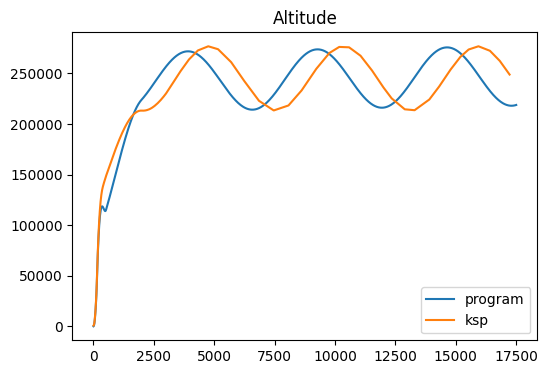

In [30]:
data = out['data']
plt.figure(1, (6, 4))
plt.plot(data["time"], data["altitude"], label='program')
plt.plot([i[0] * 3.39 for i in alt], [i[1] * 10.4 for i in alt], label='ksp')
plt.title("Altitude")
plt.legend()
plt.legend()